# New Mind Ödev

## Gerekli Kütüphaneler

In [1]:
# Kütüphaneleri import etme
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import copy

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

## Veri Setleri

In [2]:
## Satış verisini alma
sData = pd.read_csv("satis_verisi_5000.csv", index_col=0)
satisData = copy.deepcopy(sData)

In [3]:
## Müşteri verisini alma
mData = pd.read_csv("musteri_verisi_5000_utf8.csv")
musteriData = copy.deepcopy(mData)

In [4]:
# Müşteri ID sütunu üzeridxen birleştirme
df = musteriData.merge(satisData, on="musteri_id", how="inner")
df.to_csv("merge_data.csv")

## EDA

In [5]:
# İlk 10 satırını bakma
df.head(10)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,3902,Candeniz,Erkek,61,Konya,867.20,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54
1,3902,Candeniz,Erkek,61,Konya,867.20,2024-06-06,P087,Kulaklık,Elektronik,508.58,6,3051.48
2,2080,Gözel,Erkek,64,Adana,2020.97,2023-03-24,P037,Fırın,Ev Aletleri,1454.8,5,7274.0
3,2080,Gözel,Erkek,64,Adana,2020.97,2023-12-07,P018,Telefon,Elektronik,369.09,4,1476.36
4,7901,Erdogan,Kadın,63,İstanbul,4334.16,2023-03-22,P024,Bilgisayar,Elektronik,913.23,3,2739.69
5,7901,Erdogan,Kadın,63,İstanbul,4334.16,2024-02-07,P018,Telefon,Elektronik,865.58,10,8655800000000000
6,8958,Sonad,Kadın,39,İzmir,3912.39,2023-09-05,P087,Kulaklık,Elektronik,173.9,13,22607000000000000
7,8958,Sonad,Kadın,39,İzmir,3912.39,2023-08-14,P063,Klima,Elektronik,935.69,2,1871.38
8,8441,Merdi,Kadın,50,İzmir,3961.85,2024-05-21,P032,Mouse,Elektronik,522.53,3,1567.59
9,9843,Ünübol,Kadın,36,Adana,2112.75,2024-10-06,P087,Kulaklık,Elektronik,147.99,19,28118100000000000


In [6]:
# Son 10 satırını bakma
df.tail(10)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
4990,3487,Sudi,Erkek,44,Ankara,2763.92,2023-09-02,P018,Telefon,Elektronik,1298.74,19,24676.06
4991,4691,Rengül,Kadın,41,Adana,2130.31,2023-07-31,P010,Çanta,Giyim,1121.98,15,16829.7
4992,4691,Rengül,Kadın,41,Adana,2130.31,2023-05-17,P018,Telefon,Elektronik,535.26,9,4817.34
4993,4691,Rengül,Kadın,41,Adana,2130.31,2023-03-13,P011,Kalem,Kırtasiye,1467.58,15,22013.7
4994,7563,Sadat,Kadın,19,Ankara,267.52,2024-01-12,P010,Çanta,Giyim,1352.76,14,18938.64
4995,2659,Münif,Erkek,33,Konya,4779.82,2023-03-26,P097,Su Şişesi,Mutfak Ürünleri,693.08,13,9010.04
4996,4829,Razı,Erkek,38,Bursa,2918.32,2024-03-27,P097,Su Şişesi,Mutfak Ürünleri,1342.98,15,20144.7
4997,4829,Razı,Erkek,38,Bursa,2918.32,2023-07-22,P082,Defter,Kırtasiye,720.37,9,6483.33
4998,3411,Selâtin,Kadın,68,Ankara,4699.02,2024-01-17,P032,Mouse,Elektronik,529.29,18,9527.22
4999,4030,Nurtaç,Erkek,60,İzmir,3316.69,2024-10-04,P037,Fırın,Ev Aletleri,516.2,5,2581.0


In [7]:
# Veri şekli
print("-"*20 + "Veri Şekli" + "-"*20)
print(df.shape)
print("\n")

# Verimin sütun isimleri
print("-"*20 + "Sütun İsimleri" + "-"*20)
print(df.columns.values)
print("\n")

# Eksik değer kontrolü
print("-"*20 + "Eksik Değerler" + "-"*20)
print(df.isnull().sum()) 
print("\n")

# Veri türleri
print("-"*20 + "Veri türleri" + "-"*20)
print(df.dtypes)


--------------------Veri Şekli--------------------
(5000, 13)


--------------------Sütun İsimleri--------------------
['musteri_id' 'isim' 'cinsiyet' 'yas' 'sehir' 'harcama_miktari' 'tarih'
 'ürün_kodu' 'ürün_adi' 'kategori' 'fiyat' 'adet' 'toplam_satis']


--------------------Eksik Değerler--------------------
musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
tarih              0
ürün_kodu          0
ürün_adi           0
kategori           0
fiyat              0
adet               0
toplam_satis       0
dtype: int64


--------------------Veri türleri--------------------
musteri_id           int64
isim                object
cinsiyet            object
yas                  int64
sehir               object
harcama_miktari    float64
tarih               object
ürün_kodu           object
ürün_adi            object
kategori            object
fiyat               object
adet                 int64
toplam_satis        o

In [8]:
# Sayısal sütunların temel istatistikleri
df.describe()

,musteri_id,yas,harcama_miktari,adet
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,5462.697000,43.638000,2590.965966,10.071800
std,2593.182503,15.001519,1410.784841,5.461264
min,1004.000000,18.000000,101.680000,1.000000
25%,3202.000000,31.000000,1357.900000,5.000000
50%,5404.000000,43.000000,2581.710000,10.000000
75%,7710.000000,57.000000,3820.867500,15.000000
max,9998.000000,69.000000,4999.440000,19.000000


In [9]:
# Kategorik sütunların temel istatistikleri
df.describe(include='object')

,isim,cinsiyet,sehir,tarih,ürün_kodu,ürün_adi,kategori,fiyat,toplam_satis
count,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,1305,2,8,731,10,10,5,4907,4987
top,Ünübol,Kadın,Gaziantep,2024-04-27,P011,Kalem,Elektronik,565.35,535.8
freq,14,2531,653,20,533,533,2440,3,2


In [10]:
dfColumnNames = ["cinsiyet", "sehir", "ürün_adi", "kategori"]

for i in dfColumnNames:
# Kategori sütunundaki tekil değerler
    print(f"{i} sütunundaki tekil değerler: {df[i].unique()}")


cinsiyet sütunundaki tekil değerler: ['Erkek' 'Kadın']
sehir sütunundaki tekil değerler: ['Konya' 'Adana' 'İstanbul' 'İzmir' 'Bursa' 'Gaziantep' 'Antalya' 'Ankara']
ürün_adi sütunundaki tekil değerler: ['Su Şişesi' 'Kulaklık' 'Fırın' 'Telefon' 'Bilgisayar' 'Klima' 'Mouse'
 'Defter' 'Kalem' 'Çanta']
kategori sütunundaki tekil değerler: ['Mutfak Ürünleri' 'Elektronik' 'Ev Aletleri' 'Kırtasiye' 'Giyim']


In [11]:
# Dublicate satırlara bakma
df.duplicated().any()

np.False_

## Görev 1: Veri Temizleme ve Manipülasyonu 

### 1. Eksik verileri ve aykırı (outlier) verileri analiz edip temizleyin. Eksik verileri tamamlamak için çeşitli yöntemleri (ortalama, medyan gibi) kullanarak eksiklikleri doldurun.

In [12]:
# Eksik değer olmadığı için dolduracak bir veri yok
df.isnull().sum()

musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
tarih              0
ürün_kodu          0
ürün_adi           0
kategori           0
fiyat              0
adet               0
toplam_satis       0
dtype: int64

* Eksik veri yok gibi görünüyor ama eğer fiyat sütununa dikkatli bakarsak farklı değerlerin olduğunu farkederiz.

In [13]:
# Örnek bir farklı değer
df.iloc[95]["fiyat"]

'2024-04-06 00:00:00'

* Fiyat sutünu Toplam Satış bölü Adet sütunlarından oluştuğundan bu değerleri bu şekilde halledebiliriz

In [14]:
# toplam_satış sütununu numeric yapma
df['toplam_satis'] = pd.to_numeric(df['toplam_satis'], errors='coerce')

# Farklı değeleri doldurma
df["fiyat"] = df["toplam_satis"] / df["adet"]
df.iloc[95]["fiyat"].item()

6.04

### 2. Fiyat ve harcama gibi değişkenler için aykırı değerleri tespit edip verisetinden çıkarın veya aykırı değerleri belirli bir aralık içine çekin.

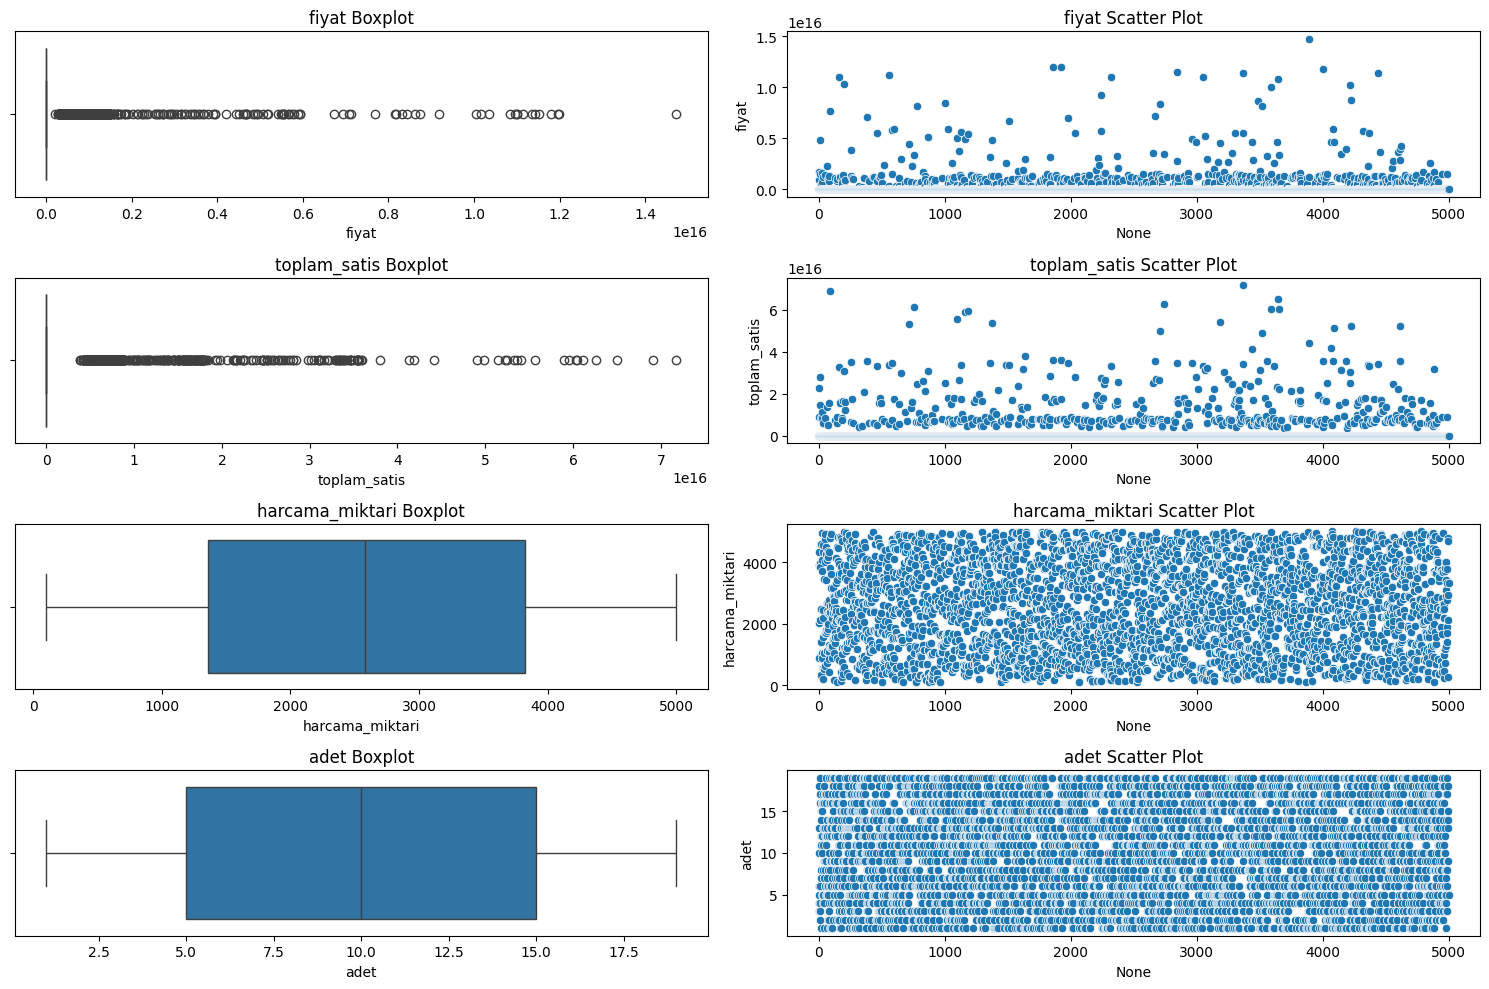

In [15]:
numColumns = ['fiyat', 'toplam_satis', 'harcama_miktari', 'adet']

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
for i, col in enumerate(numColumns):

    sns.boxplot(data=df[col], ax=ax[i, 0], orient="h")
    ax[i, 0].set_title(f'{col} Boxplot')

    sns.scatterplot(x=df.index, y=df[col], ax=ax[i, 1])
    ax[i, 1].set_title(f'{col} Scatter Plot')

plt.tight_layout()
plt.show()

* Görünüşe göre toplam_satış ve fiyat sütunlarında çok fazla outliers var.
* Veriye dikkatli bakarsak aslında toplam_satış sutünu için onlar yanlış hesaplanmış veriler. toplam_satış sutünü adet çarpı fiyat'tan oluşuyor o zaman bunları düzeltelim.

In [16]:
# toplam_satış düzeltme
df["toplam_satis"] = df["adet"] * df["fiyat"]

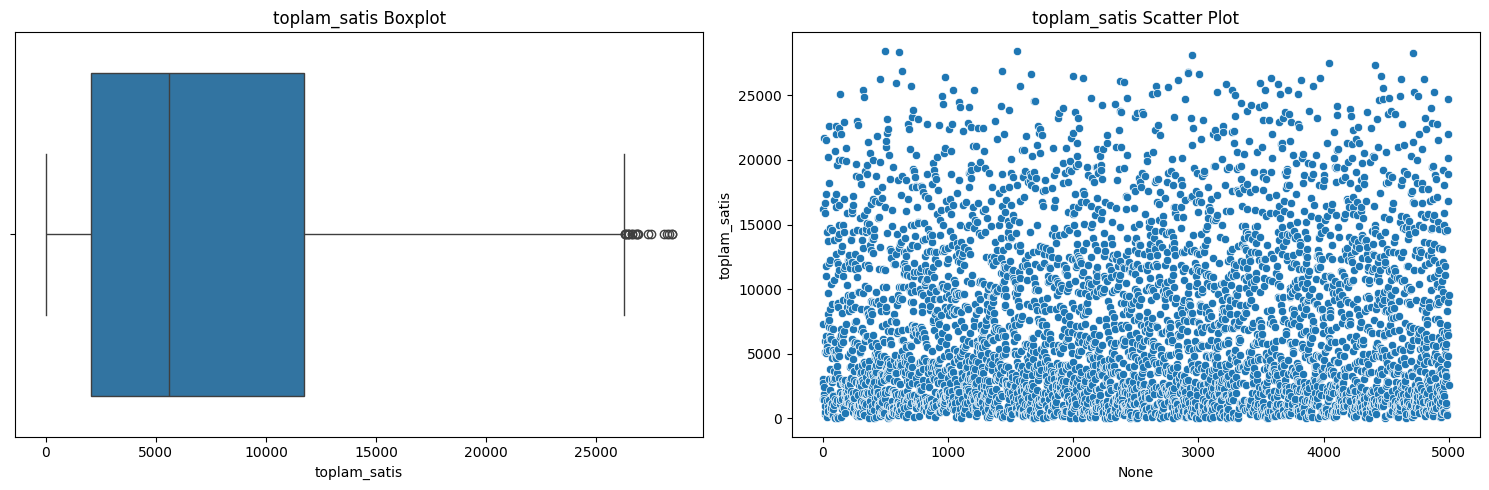

In [17]:
# Outlierlardan quantile ile kurtulma
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lowBound = Q1 - 1.5 * IQR
    uppBound = Q3 + 1.5 * IQR
    
    dfCleaned = df[(df[col] >= lowBound) & (df[col] <= uppBound)]
    
    return dfCleaned

df = remove_outliers(df, 'toplam_satis')

# Şimdi tekrar bakalım
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df["toplam_satis"], ax=ax[0], orient="h")
ax[0].set_title(f'{"toplam_satis"} Boxplot')

sns.scatterplot(x=df.index, y=df["toplam_satis"], ax=ax[1])
ax[1].set_title(f'{"toplam_satis"} Scatter Plot')

plt.tight_layout()

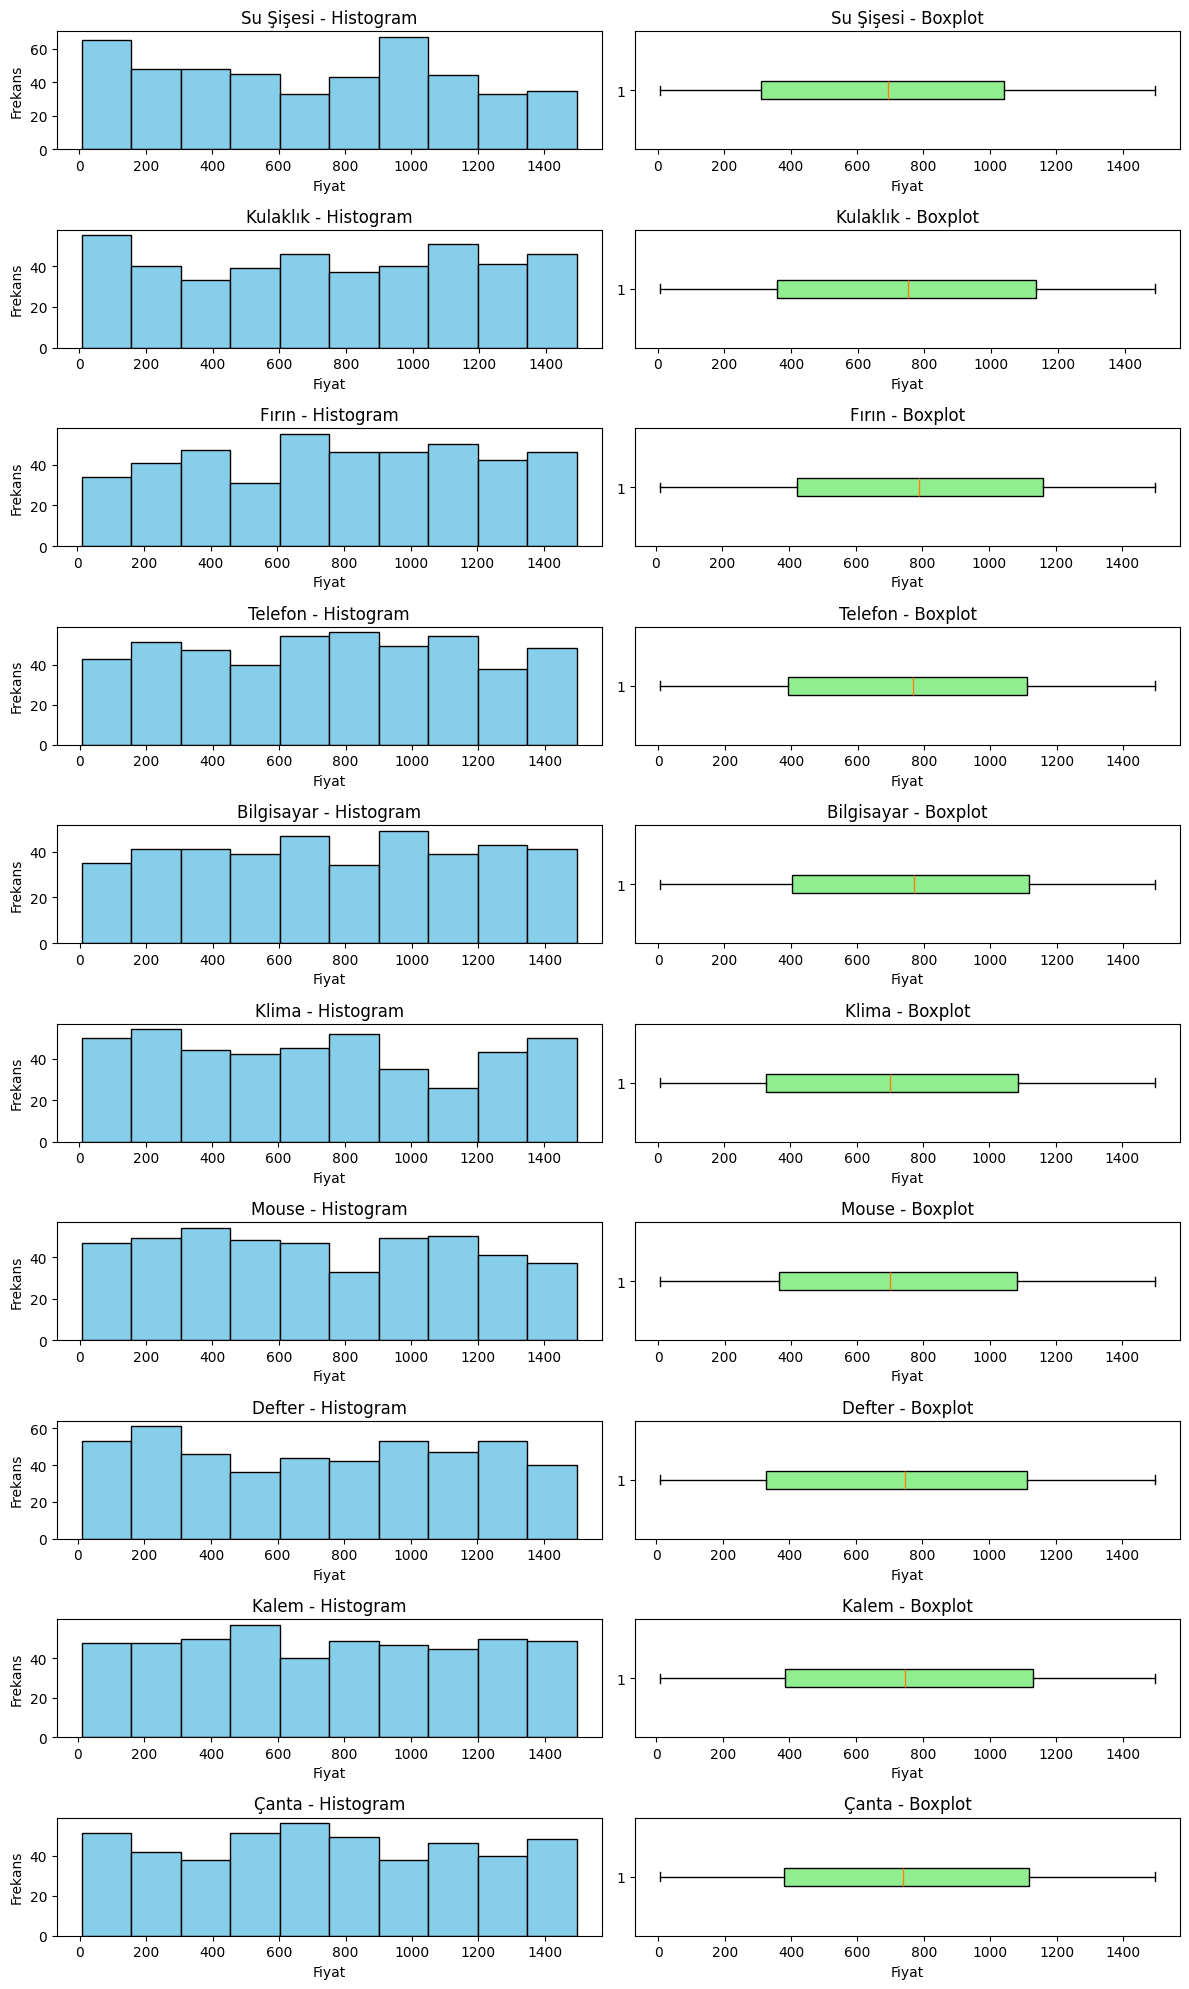

In [18]:
# Fiyat sütunu için her kategorik değer için histogram ve boxplot oluşturma
products = df["ürün_adi"].unique()

fig, axes = plt.subplots(len(products), 2, figsize=(12, 20))

for i, product in enumerate(products):
    productData = df[df["ürün_adi"] == product]["fiyat"]

    axes[i, 0].hist(productData, bins=10, color="skyblue", edgecolor="black")
    axes[i, 0].set_title(f"{product} - Histogram")
    axes[i, 0].set_xlabel("Fiyat")
    axes[i, 0].set_ylabel("Frekans")

    axes[i, 1].boxplot(productData, vert=False, patch_artist=True, boxprops=dict(facecolor="lightgreen"))
    axes[i, 1].set_title(f"{product} - Boxplot")
    axes[i, 1].set_xlabel("Fiyat")

plt.tight_layout()
plt.show()

* Kendi içindeki Uniform bir dağılımı olduğu için bu sutünlara dokunmayacam.

### 3. Müşteri verisi ile satış verisini musteri_id üzeridxen birleştirerek geniş bir veri seti oluşturun.

In [19]:
## Yukarıda yapıldı
# df = musteriData.merge(satisData, on="musteri_id", how="inner")
df.head(10)

,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis
0,3902,Candeniz,Erkek,61,Konya,867.20,2024-01-10,P097,Su Şişesi,Mutfak Ürünleri,898.53,18,16173.54
1,3902,Candeniz,Erkek,61,Konya,867.20,2024-06-06,P087,Kulaklık,Elektronik,508.58,6,3051.48
2,2080,Gözel,Erkek,64,Adana,2020.97,2023-03-24,P037,Fırın,Ev Aletleri,1454.80,5,7274.00
3,2080,Gözel,Erkek,64,Adana,2020.97,2023-12-07,P018,Telefon,Elektronik,369.09,4,1476.36
4,7901,Erdogan,Kadın,63,İstanbul,4334.16,2023-03-22,P024,Bilgisayar,Elektronik,913.23,3,2739.69
7,8958,Sonad,Kadın,39,İzmir,3912.39,2023-08-14,P063,Klima,Elektronik,935.69,2,1871.38
8,8441,Merdi,Kadın,50,İzmir,3961.85,2024-05-21,P032,Mouse,Elektronik,522.53,3,1567.59
10,9843,Ünübol,Kadın,36,Adana,2112.75,2023-12-19,P018,Telefon,Elektronik,233.91,6,1403.46
11,9843,Ünübol,Kadın,36,Adana,2112.75,2023-01-16,P082,Defter,Kırtasiye,142.07,17,2415.19
13,3142,Özpetek,Erkek,29,Bursa,3835.22,2024-08-23,P024,Bilgisayar,Elektronik,1357.56,16,21720.96


## Görev 2: Zaman Serisi Analizi

### 1. Satış verisi üzerinde haftalık ve aylık bazda toplam satış ve ürün satış trendlerini analiz edin.

In [20]:
# Tarihleri datetime formatına çevirme
df["tarih"] = pd.to_datetime(df["tarih"], errors="coerce")

# Haftalık toplam satış
df["hafta"] = df["tarih"].dt.to_period("W").astype(str)
haftalikSatis = df.groupby("hafta").agg({"toplam_satis": "sum"}).reset_index()

# Haftalık ürün bazında satış
haftalikUrunSatis = df.groupby(['hafta', 'ürün_adi']).agg({'adet': 'sum'}).reset_index()

# Aylık toplam satış
df['ay'] = df['tarih'].dt.to_period('M').astype(str) 
aylikSatis = df.groupby('ay').agg({'toplam_satis': 'sum'}).reset_index()

# Aylık ürün bazında satış
aylikUrunSatis = df.groupby(['ay', 'ürün_adi']).agg({'adet': 'sum'}).reset_index()

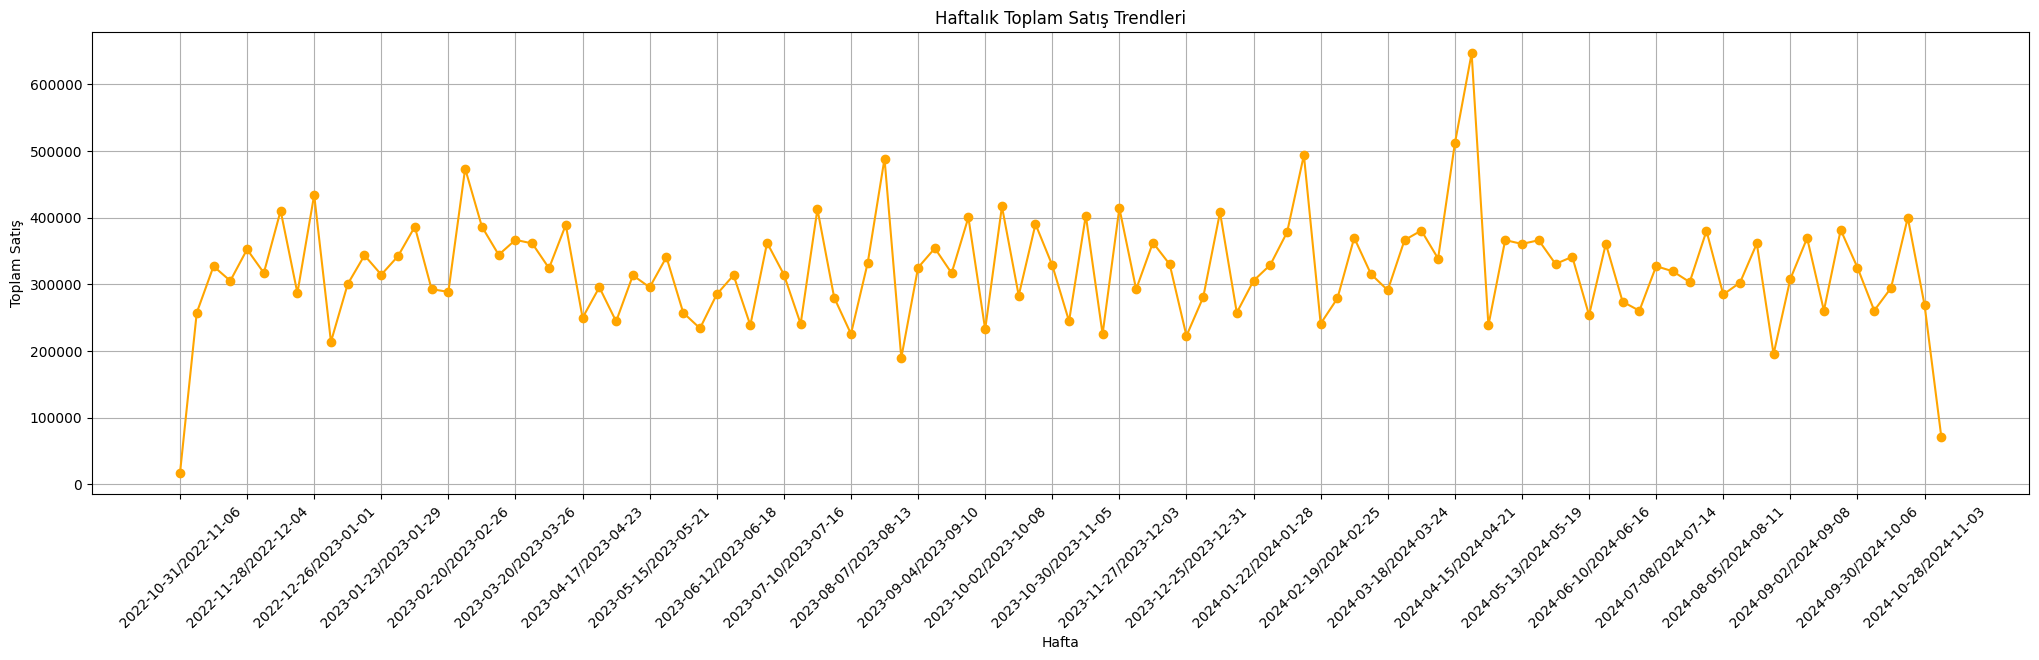

In [21]:
# Haftalık toplam satış grafiği
plt.figure(figsize=(25, 6))
plt.plot(haftalikSatis["hafta"], haftalikSatis["toplam_satis"], marker="o", color='orange')
plt.title('Haftalık Toplam Satış Trendleri')
plt.xlabel('Hafta')
plt.ylabel('Toplam Satış')
plt.xticks(ticks=range(0, len(haftalikSatis['hafta']), 4),  
           labels=haftalikSatis['hafta'][::4], rotation=45) 
plt.grid(True)
plt.show()


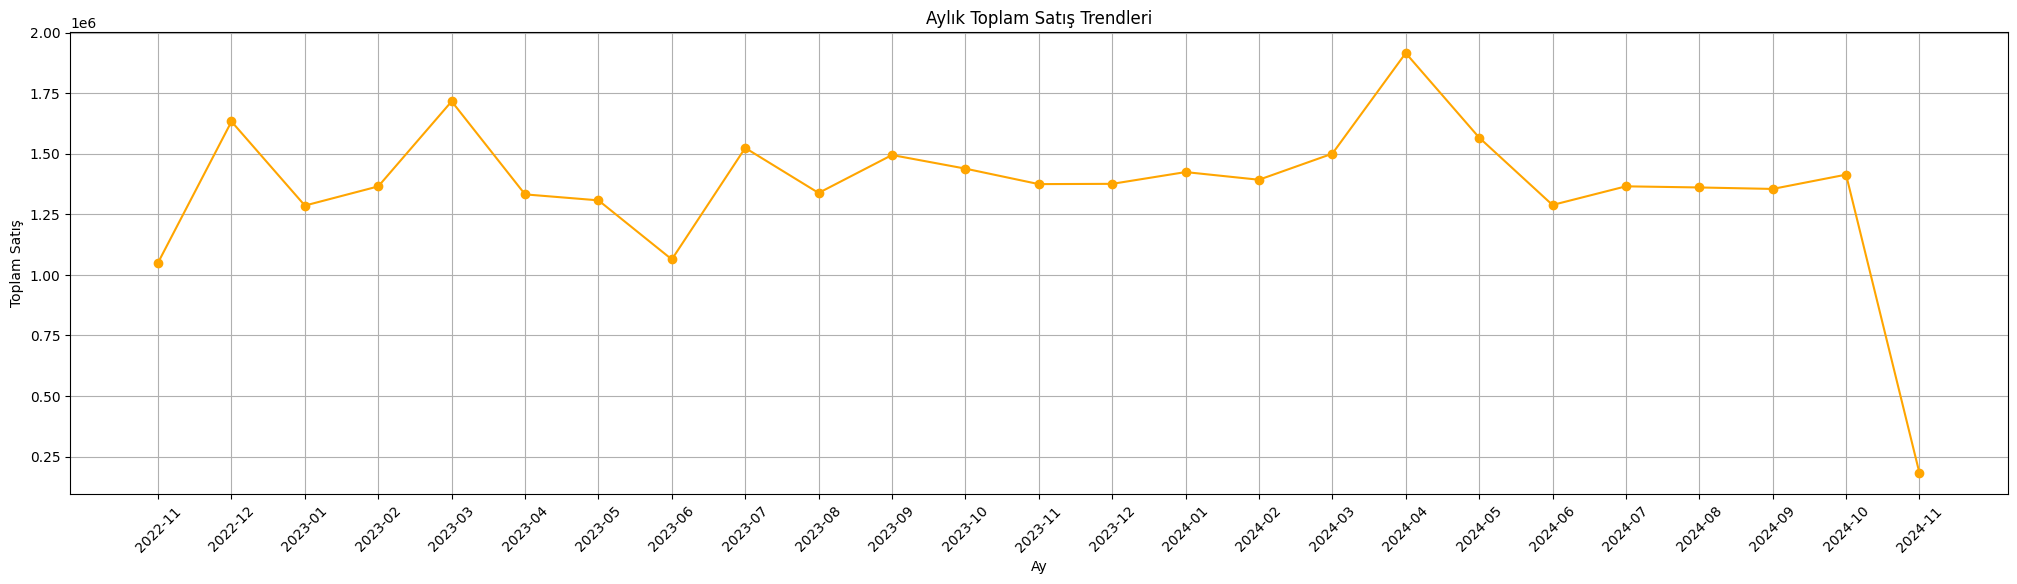

In [22]:
# Aylık toplam satış grafiği
plt.figure(figsize=(25, 6))
plt.plot(aylikSatis['ay'], aylikSatis['toplam_satis'], marker='o', color='orange')
plt.title('Aylık Toplam Satış Trendleri')
plt.xlabel('Ay')
plt.ylabel('Toplam Satış')
plt.xticks(ticks=aylikSatis['ay'], rotation=45) 
plt.grid(True)
plt.show()

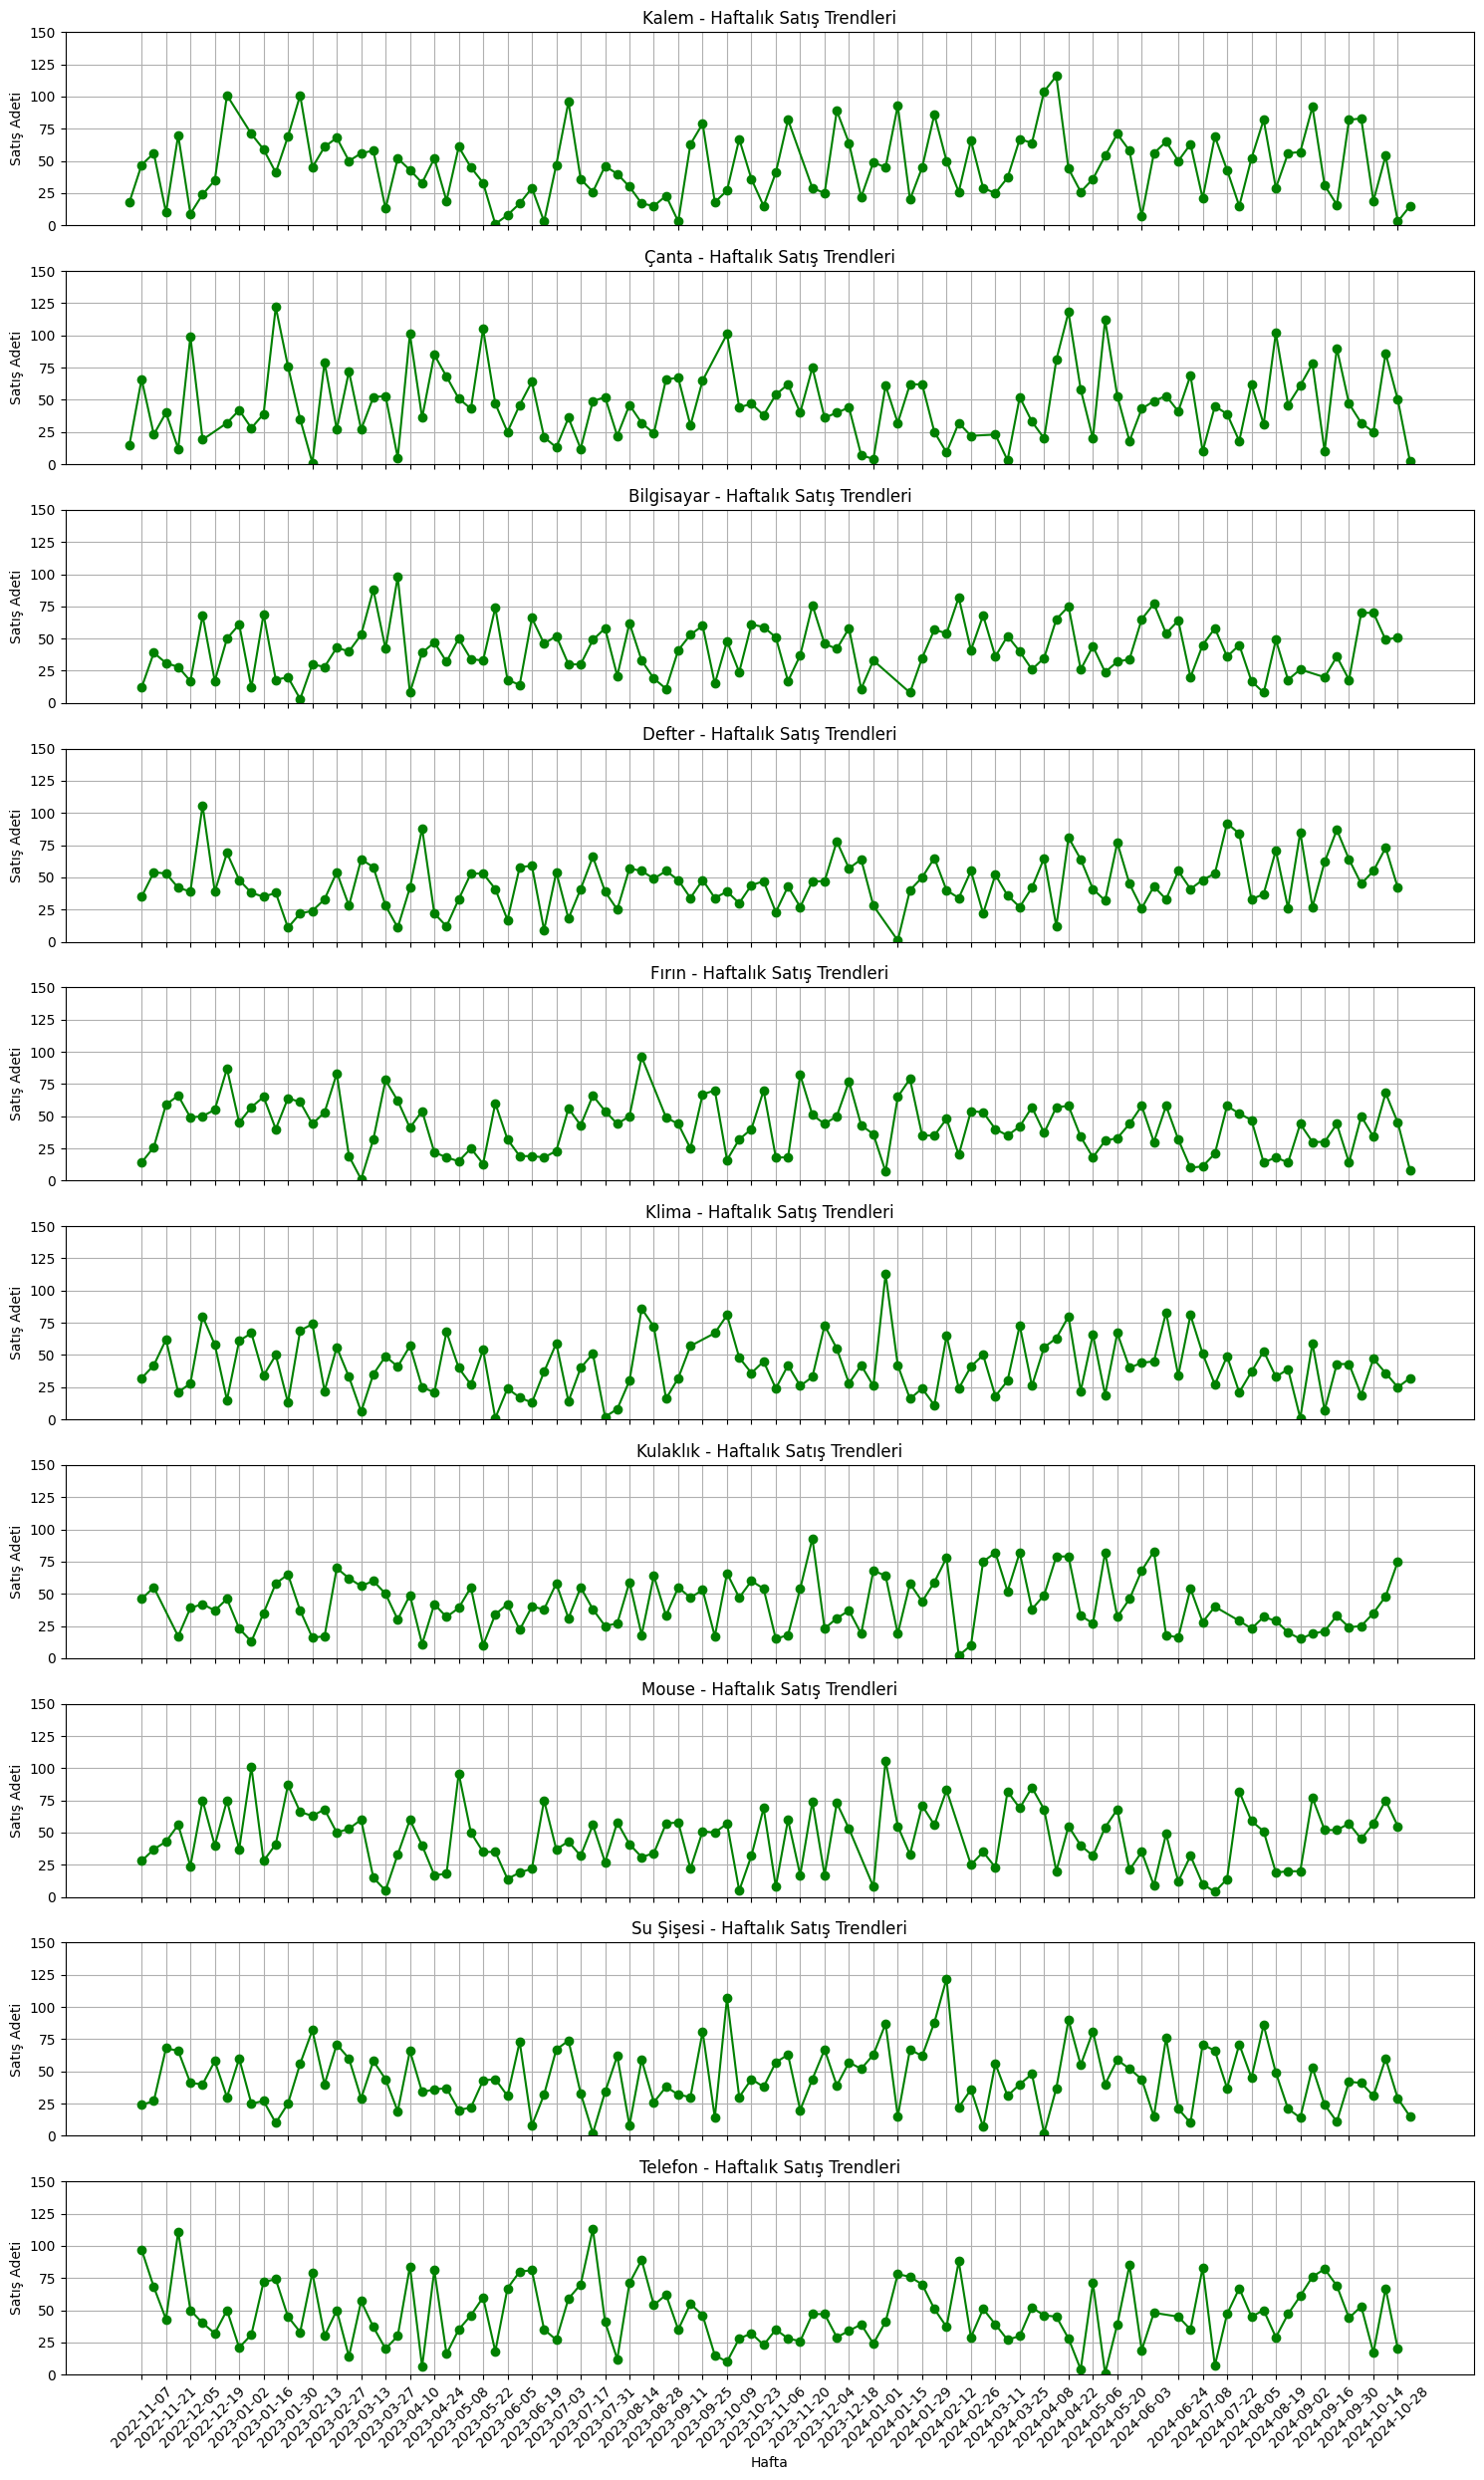

In [23]:
# Haftalık toplam satış verisini grup ve grafik oluşturma
products = haftalikUrunSatis['ürün_adi'].unique()
haftalikUrunSatis['hafta_start'] = haftalikUrunSatis['hafta'].apply(lambda x: pd.to_datetime(x.split('/')[0]))

fig, ax = plt.subplots(len(products), 1, figsize=(15, 25), sharex=True)

for i, product in enumerate(products):
    urunData = haftalikUrunSatis[haftalikUrunSatis['ürün_adi'] == product]

    ax[i].plot(urunData['hafta_start'], urunData['adet'], marker='o', color='g')
    ax[i].set_title(f'{product} - Haftalık Satış Trendleri')
    ax[i].set_ylabel('Satış Adeti')
    ax[i].grid(True)
    ax[i].set_ylim([0,150])

ax[-1].set_xlabel('Hafta')
ax[-1].set_xticks(urunData['hafta_start'][::2]) 
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

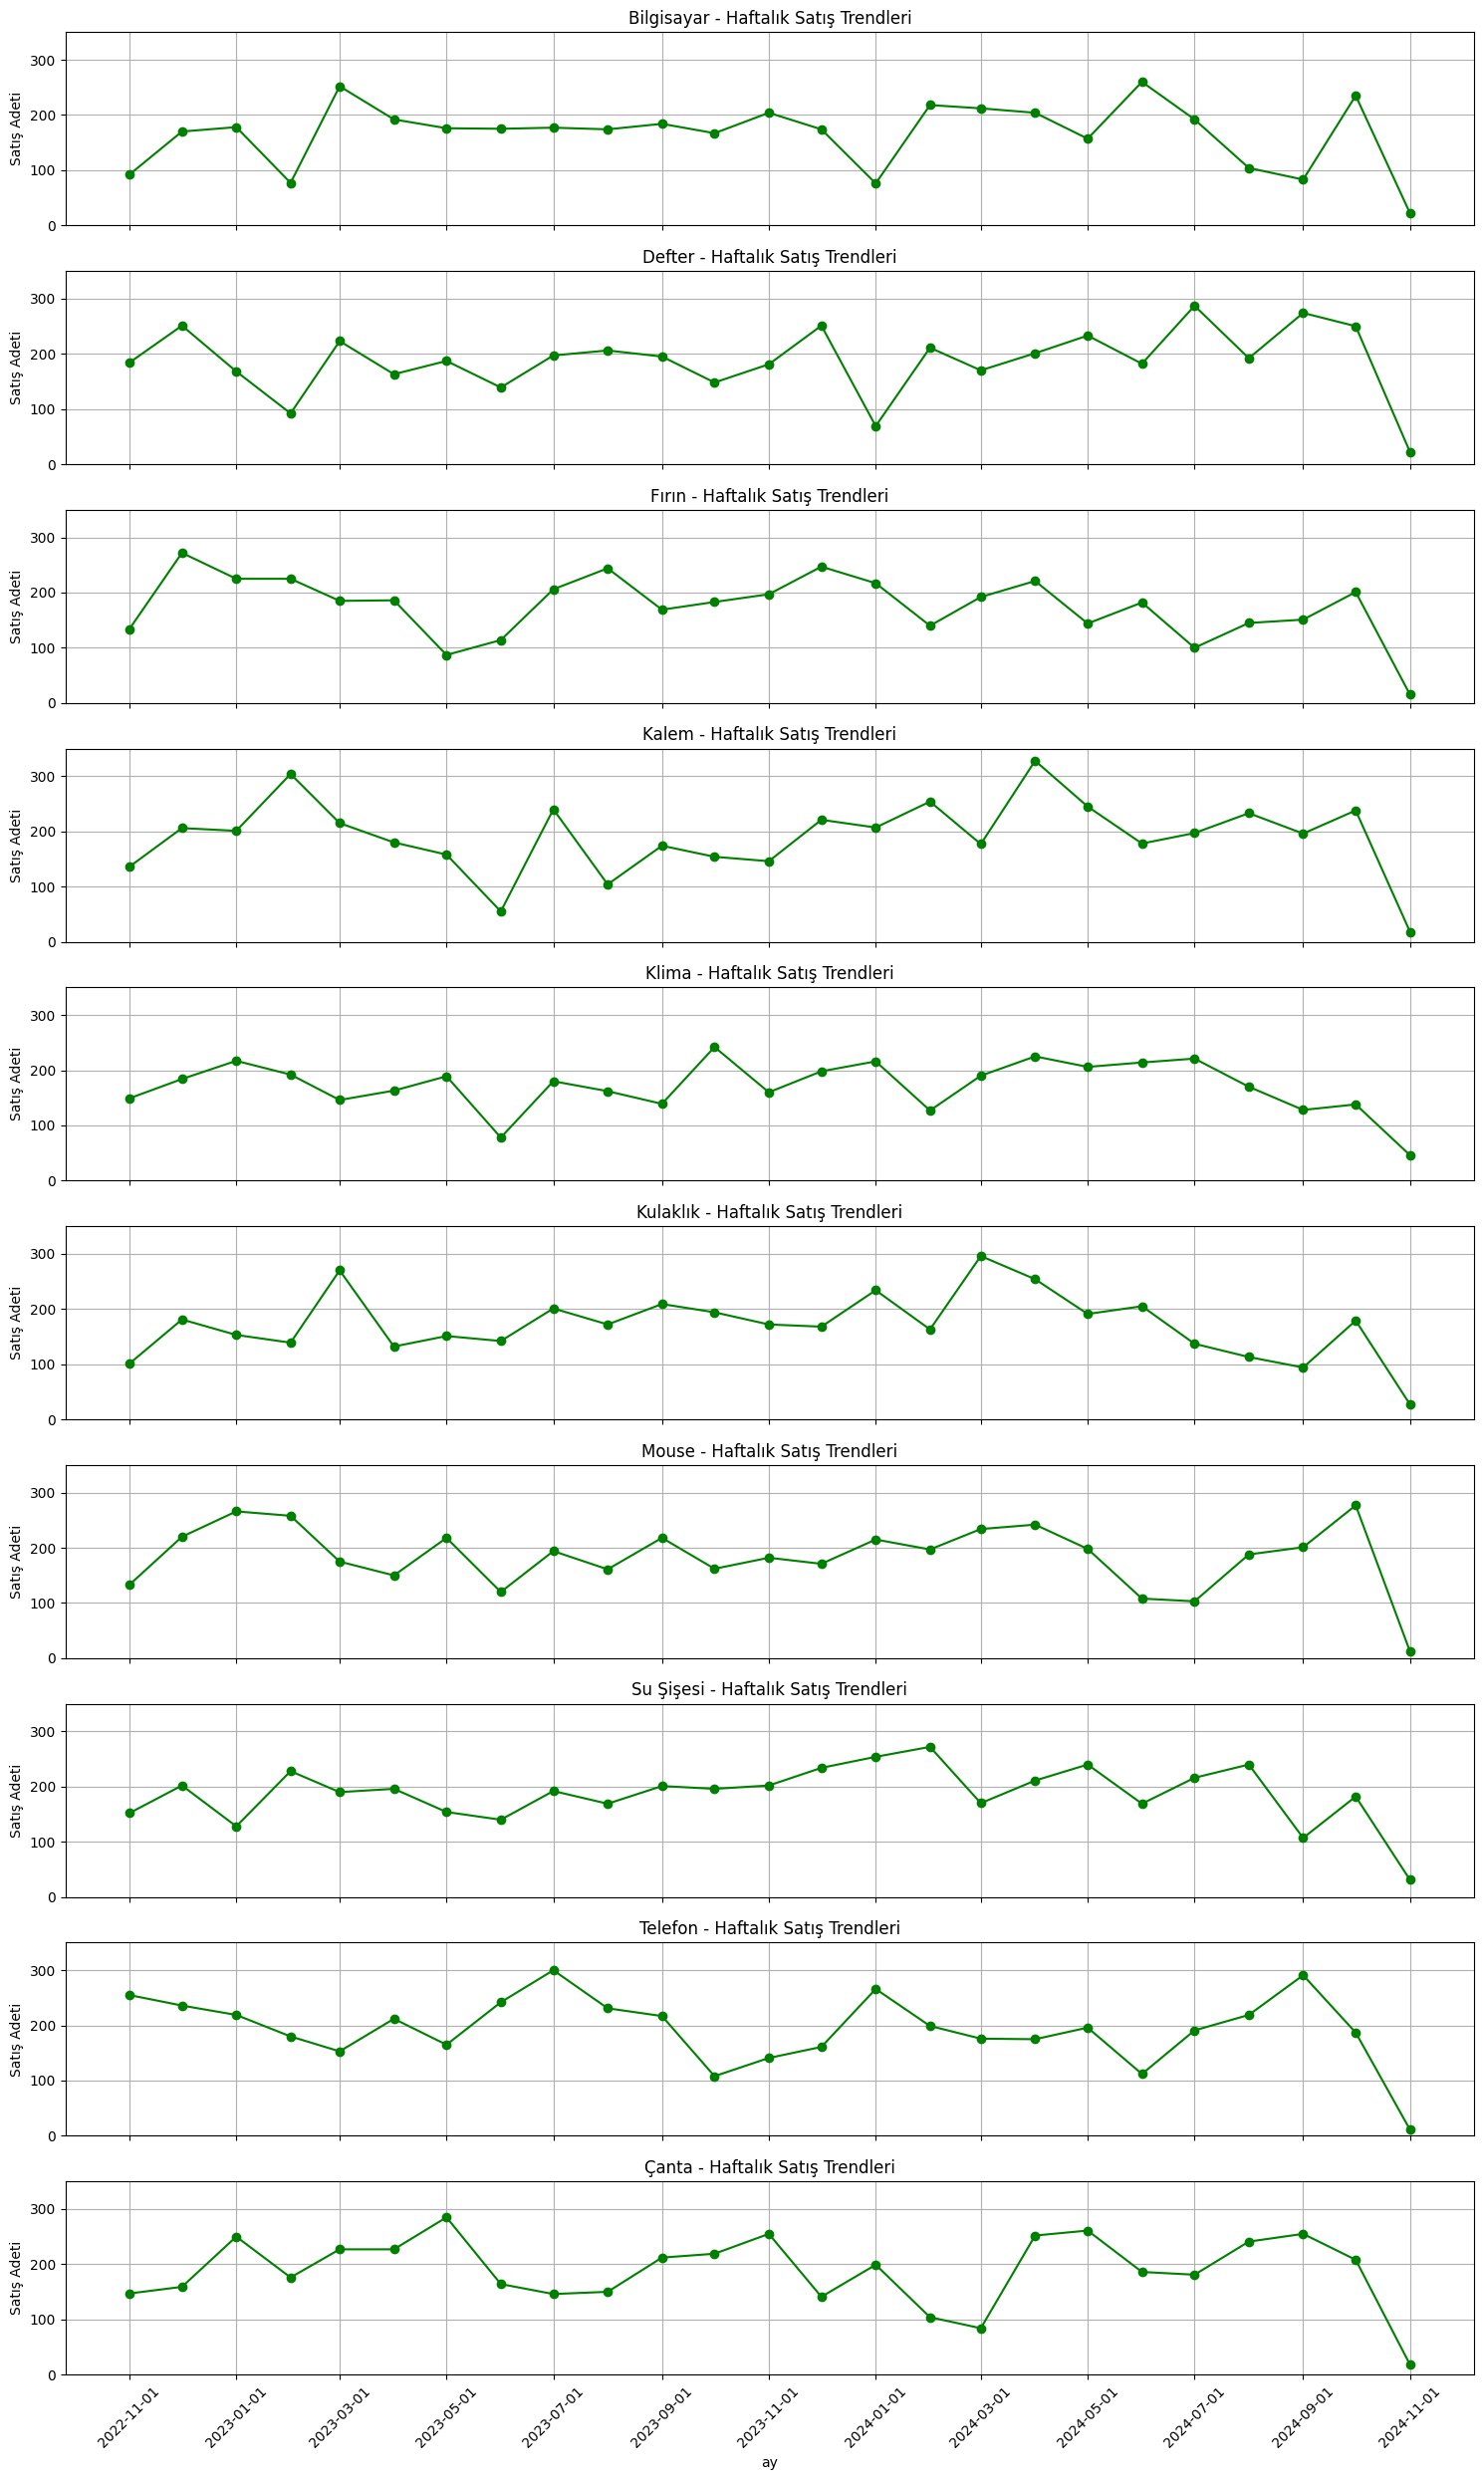

In [24]:
# Haftalık toplam satış verisini grup ve grafik oluşturma
products = aylikUrunSatis['ürün_adi'].unique()
aylikUrunSatis['ay_baslangıc'] = aylikUrunSatis['ay'].apply(lambda x: pd.to_datetime(x.split('/')[0]))

fig, ax = plt.subplots(len(products), 1, figsize=(15, 25), sharex=True)

for i, product in enumerate(products):
    urunData = aylikUrunSatis[aylikUrunSatis['ürün_adi'] == product]

    ax[i].plot(urunData['ay_baslangıc'], urunData['adet'], marker='o', color='g')
    ax[i].set_title(f'{product} - Haftalık Satış Trendleri')
    ax[i].set_ylabel('Satış Adeti')
    ax[i].grid(True)
    ax[i].set_ylim([0,350])

ax[-1].set_xlabel('ay')
ax[-1].set_xticks(urunData['ay_baslangıc'][::2]) 
ax[-1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.Tarih sütununu kullanarak, her ayın ilk ve son satış günlerini bulun. Ayrıca, her hafta kaç ürün satıldığını hesaplayın.

In [25]:
# Ay bazında gruplama ve ilk satış günü
ayIlkGun = df.groupby(df['tarih'].dt.to_period('M'))['tarih'].min().reset_index(drop=True)
ayIlkGun = ayIlkGun.rename('ayIlkGun')

# Ay bazında gruplama ve son satış günü
aySonGun = df.groupby(df['tarih'].dt.to_period('M'))['tarih'].max().reset_index(drop=True)
aySonGun = aySonGun.rename('aySonGun')

# Her ayın ilk ve son satış günlerini birleştirme
ayIlkSon = pd.concat([ayIlkGun, aySonGun], axis=1)
ayIlkSon.head(10)

,ayIlkGun,aySonGun
0,2022-11-06,2022-11-30
1,2022-12-01,2022-12-31
2,2023-01-01,2023-01-31
3,2023-02-01,2023-02-28
4,2023-03-01,2023-03-31
5,2023-04-01,2023-04-30
6,2023-05-01,2023-05-31
7,2023-06-01,2023-06-30
8,2023-07-01,2023-07-31
9,2023-08-01,2023-08-31


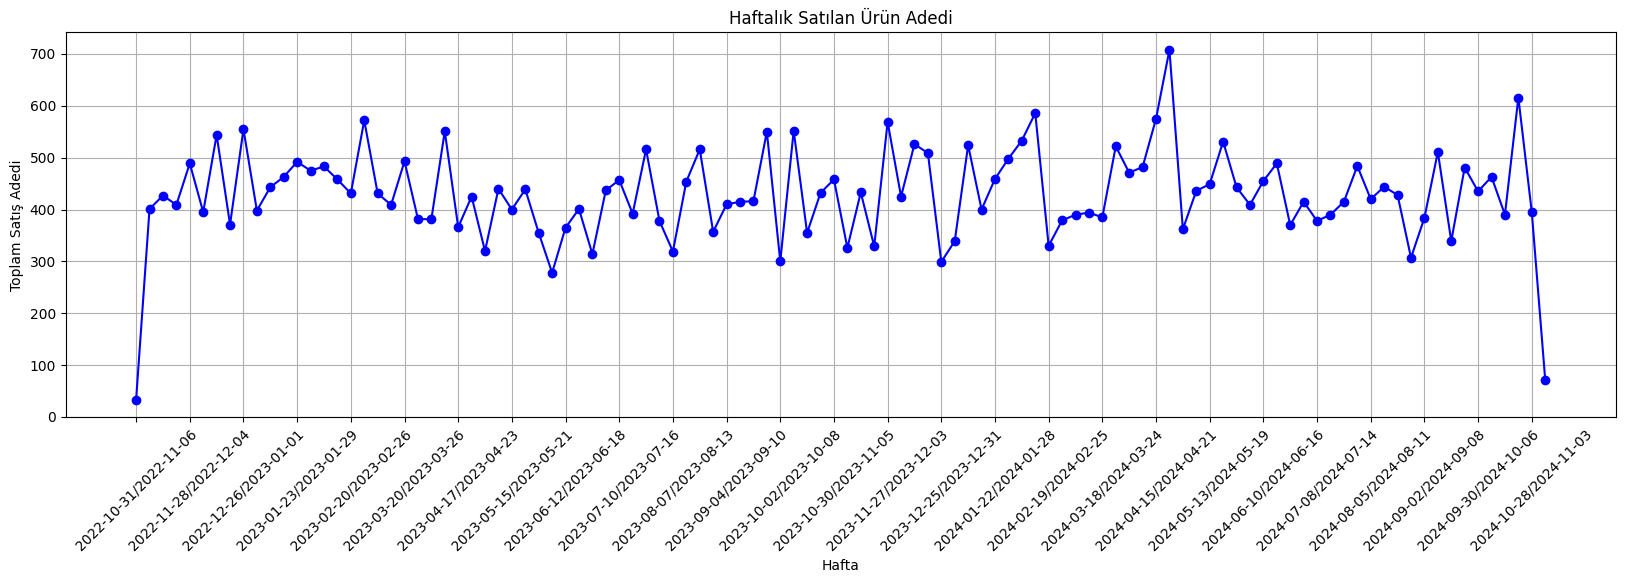

In [26]:
# Her hafta kaç ürün satıldığını hesaplama
haftalikUrunSatis = df.groupby('hafta')['adet'].sum().reset_index()

plt.figure(figsize=(20, 5))
plt.plot(haftalikUrunSatis['hafta'], haftalikUrunSatis['adet'], marker='o', color='blue')
plt.title('Haftalık Satılan Ürün Adedi')
plt.xlabel('Hafta')
plt.ylabel('Toplam Satış Adedi')
plt.xticks(ticks=haftalikSatis["hafta"][::4] ,rotation=45)
plt.grid(True)
plt.show()

### 3.Zaman serisindeki trendleri tespit etmek için grafikler çizdirin (örneğin: aylık satış artışı veya düşüşü).

In [27]:
# Yukarıdaki grafiklerde görebilirsiniz.

## Görev 3: Kategorisel ve Sayısal Analiz (%25)

### 1.Ürün kategorilerine göre toplam satış miktarını ve her kategorinin tüm satışlar içindeki oranını hesaplayın.

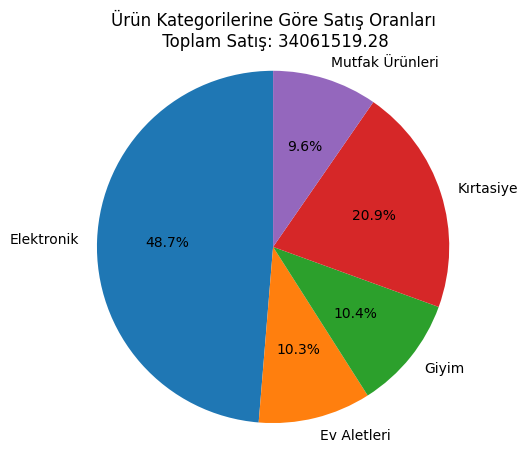

In [40]:
# Ürün kategorilerine göre toplam satış miktarını hesaplama
kategoriSatis = df.groupby('kategori')['toplam_satis'].sum().reset_index()

# Toplam satış miktarını hesaplama
toplamSatis = kategoriSatis['toplam_satis'].sum()

# Her kategorinin toplam satışlar içidxeki oranını hesaplama
kategoriSatis['orani'] = kategoriSatis['toplam_satis'] / toplamSatis * 100

plt.figure(figsize=(5, 5))
plt.pie(kategoriSatis['orani'], labels=kategoriSatis['kategori'], autopct='%1.1f%%', startangle=90)
plt.title(f'Ürün Kategorilerine Göre Satış Oranları\n Toplam Satış: {round(toplamSatis,2)}')
plt.axis('equal') 
plt.show()

### 2.Müşterilerin yaş gruplarına göre satış eğilimlerini analiz edin. (Örnek yaş grupları: 18-25, 26-35, 36-50, 50+)

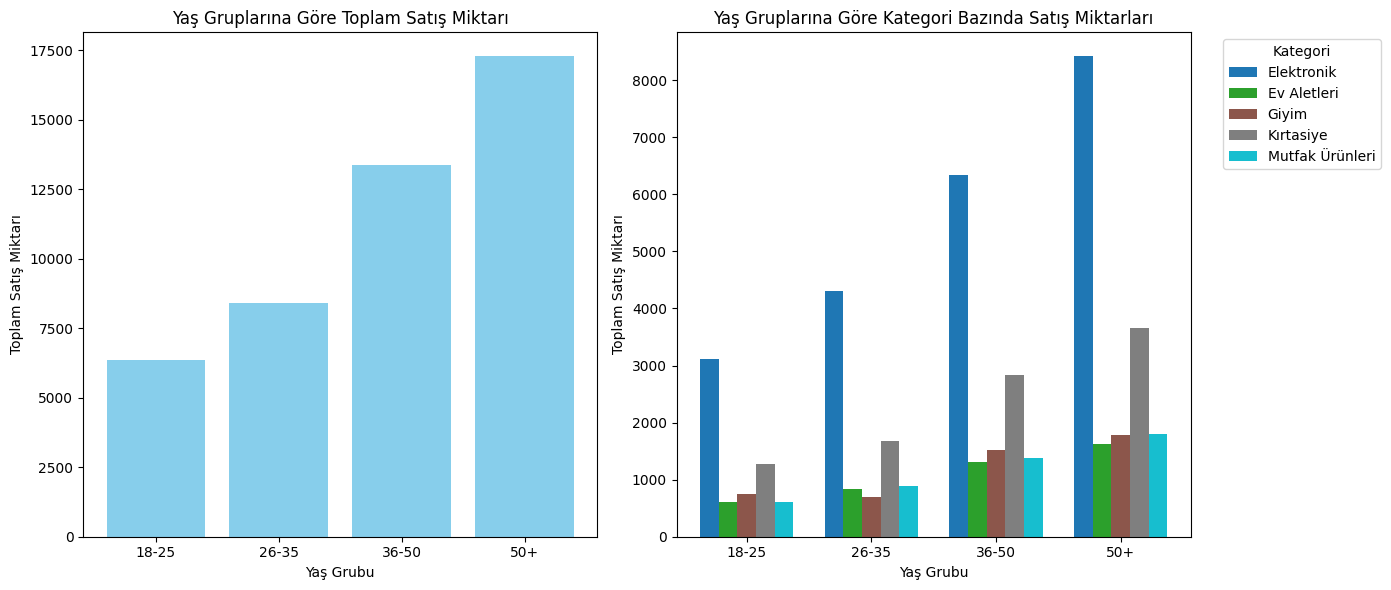

In [29]:
# Yaş gruplarını oluşturma
bins = [18, 25, 35, 50, float('inf')] 
labels = ['18-25', '26-35', '36-50', '50+']
df['yas_grubu'] = pd.cut(df['yas'], bins=bins, labels=labels, right=False)

# Yaş grubu bazında toplam satış
yasGrubuSatis = df.groupby('yas_grubu')['adet'].sum().reset_index()

# Yaş grubu ve kategori bazında satış
yasGrubuKategoriSatis = df.groupby(['yas_grubu', 'kategori'])['adet'].sum().unstack().fillna(0).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(yasGrubuSatis['yas_grubu'], yasGrubuSatis['adet'], color='skyblue')
ax[0].set_title('Yaş Gruplarına Göre Toplam Satış Miktarı')
ax[0].set_xlabel('Yaş Grubu')
ax[0].set_ylabel('Toplam Satış Miktarı')

barGenislik = 0.15  
idx = np.arange(len(yasGrubuKategoriSatis))

numKategori = len(yasGrubuKategoriSatis.columns[1:])  
renkler = plt.cm.get_cmap('tab10', numKategori)  

for i, column in enumerate(yasGrubuKategoriSatis.columns[1:]): 
    ax[1].bar(idx + i * barGenislik, yasGrubuKategoriSatis[column], barGenislik, label=column, color=renkler(i))

ax[1].set_title('Yaş Gruplarına Göre Kategori Bazında Satış Miktarları')
ax[1].set_xlabel('Yaş Grubu')
ax[1].set_ylabel('Toplam Satış Miktarı')
ax[1].set_xticks(idx + barGenislik * (numKategori - 1) / 2)   
ax[1].set_xticklabels(yasGrubuKategoriSatis['yas_grubu'])  
ax[1].legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 3.Kadın ve erkek müşterilerin harcama miktarlarını karşılaştırın ve harcama davranışları arasındaki farkı tespit edin.

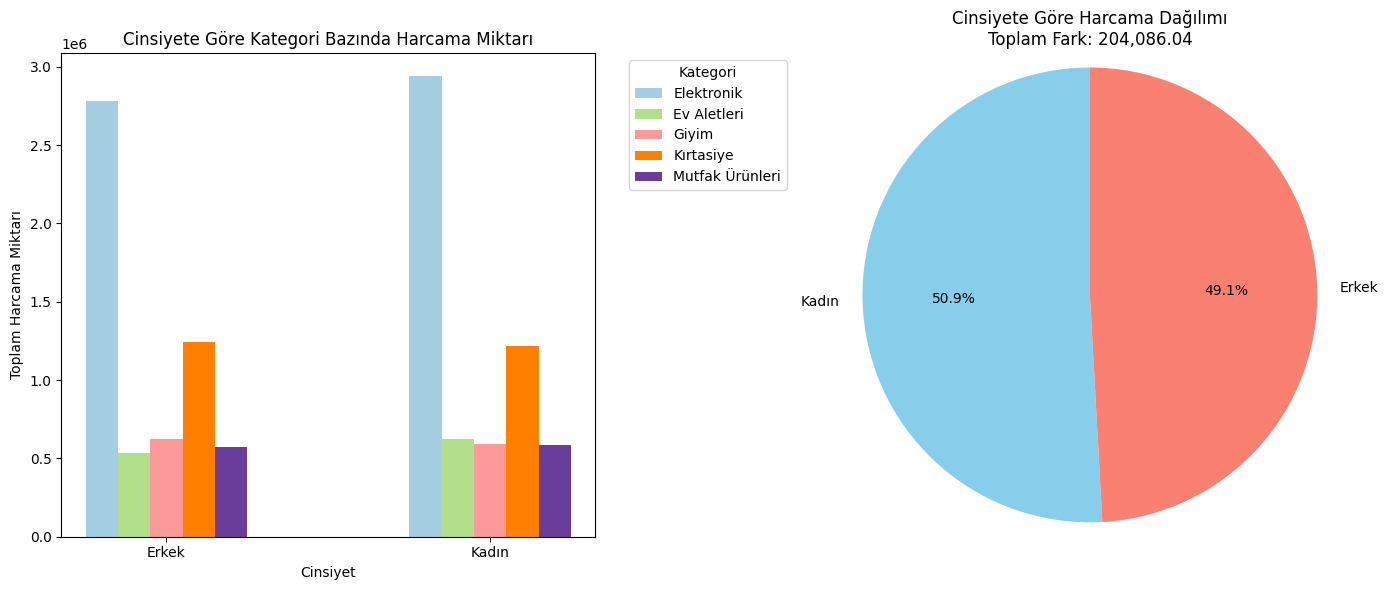

In [30]:
# Kategorilere ve cinsiyetlere göre harcama hesaplama
cinsiyetKategoriHarcama = df.groupby(['kategori', 'cinsiyet'])['harcama_miktari'].sum().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

kategoriler = cinsiyetKategoriHarcama['kategori'].unique()
cinsiyetler = cinsiyetKategoriHarcama['cinsiyet'].unique()

barGenislik = 0.1  

idx = range(len(cinsiyetler))

for i, kategori in enumerate(kategoriler):
    kategoriData = cinsiyetKategoriHarcama[cinsiyetKategoriHarcama['kategori'] == kategori]
    
    for j, cinsiyet in enumerate(cinsiyetler):
        cinsiyetData = kategoriData[kategoriData['cinsiyet'] == cinsiyet]
        ax[0].bar(idx[j] + i * barGenislik, cinsiyetData['harcama_miktari'].values[0], 
                    width=barGenislik, label=kategori if j == 0 else "", color=plt.cm.Paired(i / len(kategoriler)))

ax[0].set_title('Cinsiyete Göre Kategori Bazında Harcama Miktarı')
ax[0].set_xlabel('Cinsiyet')
ax[0].set_ylabel('Toplam Harcama Miktarı')
ax[0].set_xticks([idx[0] + (len(kategoriler) - 1) * barGenislik / 2, idx[1] + (len(kategoriler) - 1) * barGenislik / 2])  
ax[0].set_xticklabels(cinsiyetler) 
ax[0].legend(title='Kategori', bbox_to_anchor=(1.05, 1), loc='upper left')

cinsiyetHarcama = df.groupby('cinsiyet')['harcama_miktari'].sum().reset_index()

toplamHarcamaKadın = cinsiyetHarcama[cinsiyetHarcama['cinsiyet'] == 'Kadın']['harcama_miktari'].values[0]
toplam_harcama_erkek = cinsiyetHarcama[cinsiyetHarcama['cinsiyet'] == 'Erkek']['harcama_miktari'].values[0]
fark = abs(toplamHarcamaKadın - toplam_harcama_erkek)

labels = ['Kadın', 'Erkek']
sizes = [toplamHarcamaKadın, toplam_harcama_erkek]
renkler = ['skyblue', 'salmon']

ax[1].pie(sizes, labels=labels, colors=renkler, autopct='%1.1f%%', startangle=90)
ax[1].axis('equal')  
ax[1].set_title(f'Cinsiyete Göre Harcama Dağılımı\nToplam Fark: {fark:,.2f}')

plt.tight_layout()
plt.show()


## Görev 4: İleri Düzey Veri Manipülasyonu (%25)

### Müşterilerin şehir bazında toplam harcama miktarını bulun ve şehirleri en çok harcama yapan müşterilere göre sıralayın.

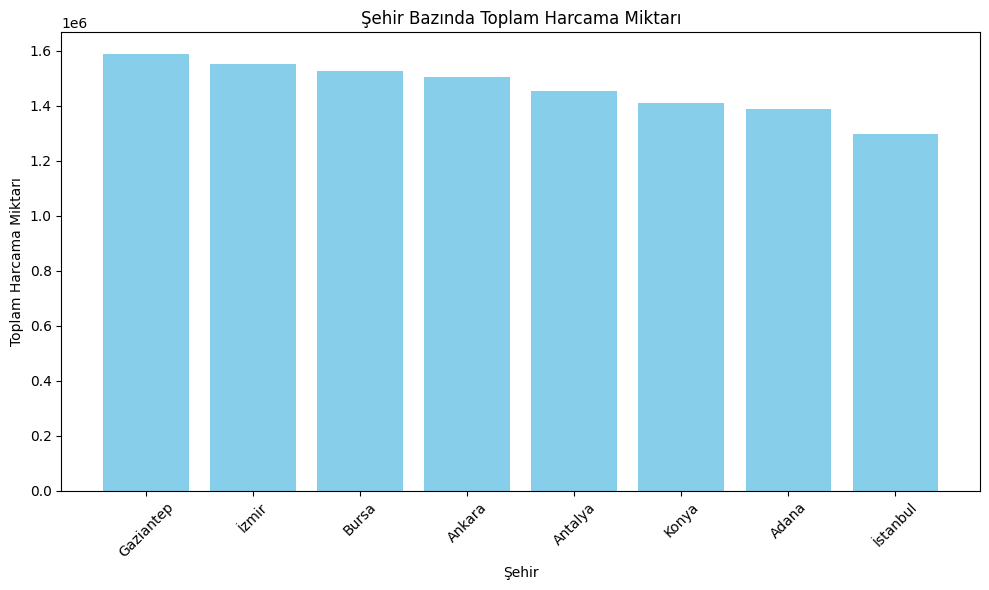

In [31]:
# Şehir bazında toplam harcama miktarlarını hesaplama

sehirHarcama = df.groupby('sehir')['harcama_miktari'].sum().reset_index()

sehirHarcamaSirali = sehirHarcama.sort_values(by='harcama_miktari', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sehirHarcamaSirali['sehir'], sehirHarcamaSirali['harcama_miktari'], color='skyblue')
plt.title('Şehir Bazında Toplam Harcama Miktarı')
plt.xlabel('Şehir')
plt.ylabel('Toplam Harcama Miktarı')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

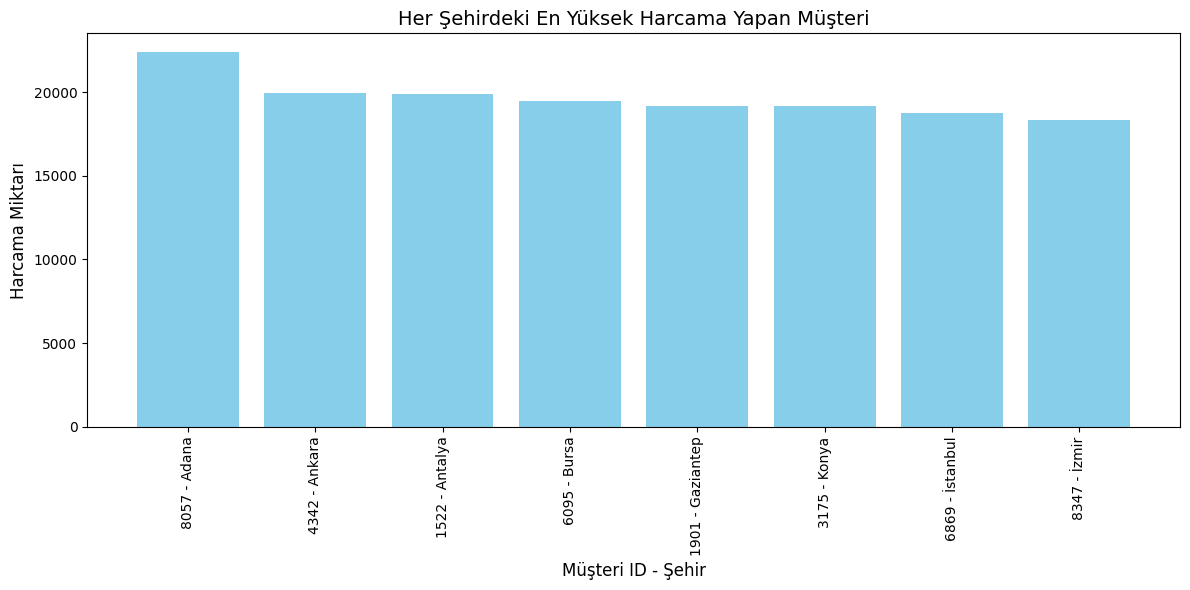

In [32]:
# En yüksek harcama yapan müşteri ve şehir bilgilerini çekme
sehirBazindaHarcama = df.groupby(["musteri_id", "sehir"])["harcama_miktari"].sum()
idSehirBazindaHarcama = sehirBazindaHarcama.groupby("sehir").idxmax()
maksimumSehirBazindaHarcama = sehirBazindaHarcama.groupby("sehir").max().sort_values(ascending=False)

sehirHarcamaVerisi = {
    "MusteriID": [idx[0] for idx in idSehirBazindaHarcama],
    "Sehir": [idx[1] for idx in idSehirBazindaHarcama],
    "HarcamaMiktari": maksimumSehirBazindaHarcama
}

plt.figure(figsize=(12, 6))
sehirHarcamaVerisi['MusteriSehir'] = [f"{musteriID} - {sehir}" for musteriID, sehir in zip(sehirHarcamaVerisi["MusteriID"], sehirHarcamaVerisi["Sehir"])]
plt.bar(sehirHarcamaVerisi['MusteriSehir'], sehirHarcamaVerisi['HarcamaMiktari'], color='skyblue')
plt.xlabel('Müşteri ID - Şehir', fontsize=12)
plt.ylabel('Harcama Miktarı', fontsize=12)
plt.title('Her Şehirdeki En Yüksek Harcama Yapan Müşteri', fontsize=14)
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

### 2. Satış verisinde her bir ürün için ortalama satış artışı oranı hesaplayın. Bu oranı hesaplamak için her bir üründe önceki aya göre satış değişim yüzdesini kullanın.

In [33]:
# Ay bazında satışları gruplayıp her bir ürün için toplam satışları hesaplama
df['ay'] = df['tarih'].dt.to_period('M')
urunSatisAylik = df.groupby(['ürün_adi', 'ay'])['adet'].sum().reset_index()

# Satışları ürün ve ay bazında sıralama
urunSatisAylik = urunSatisAylik.sort_values(by=['ürün_adi', 'ay'])

satisDegisimYüzdesi = []
for urun in urunSatisAylik['ürün_adi'].unique():
    urunData = urunSatisAylik[urunSatisAylik['ürün_adi'] == urun]
    
    for i in range(1, len(urunData)):
        öncekiAySatis = urunData.iloc[i - 1]['adet']
        buAySatis = urunData.iloc[i]['adet']
        
        degisimYuzdesi = ((buAySatis - öncekiAySatis) / öncekiAySatis) * 100
        satisDegisimYüzdesi.append({'ürün_adi': urun, 'ay': urunData.iloc[i]['ay'], 'satisDegisimYüzdesi': degisimYuzdesi})

satisDegisimDf = pd.DataFrame(satisDegisimYüzdesi)

# Ortalama satış artışını hesaplama
ortSatisArtisi = satisDegisimDf.groupby('ürün_adi')['satisDegisimYüzdesi'].mean().reset_index()

print(ortSatisArtisi)

     ürün_adi  satisDegisimYüzdesi
0  Bilgisayar            16.566223
1      Defter             9.747329
2       Fırın             4.034403
3       Kalem            13.324152
4       Klima             3.055668
5    Kulaklık             5.451167
6       Mouse             4.199478
7   Su Şişesi             1.996467
8     Telefon            -0.405243
9       Çanta             5.478886


### 3. Pandas groupby ile her bir kategorinin aylık toplam satışlarını hesaplayın ve değişim oranlarını grafikle gösterin.

<Figure size 1200x600 with 0 Axes>

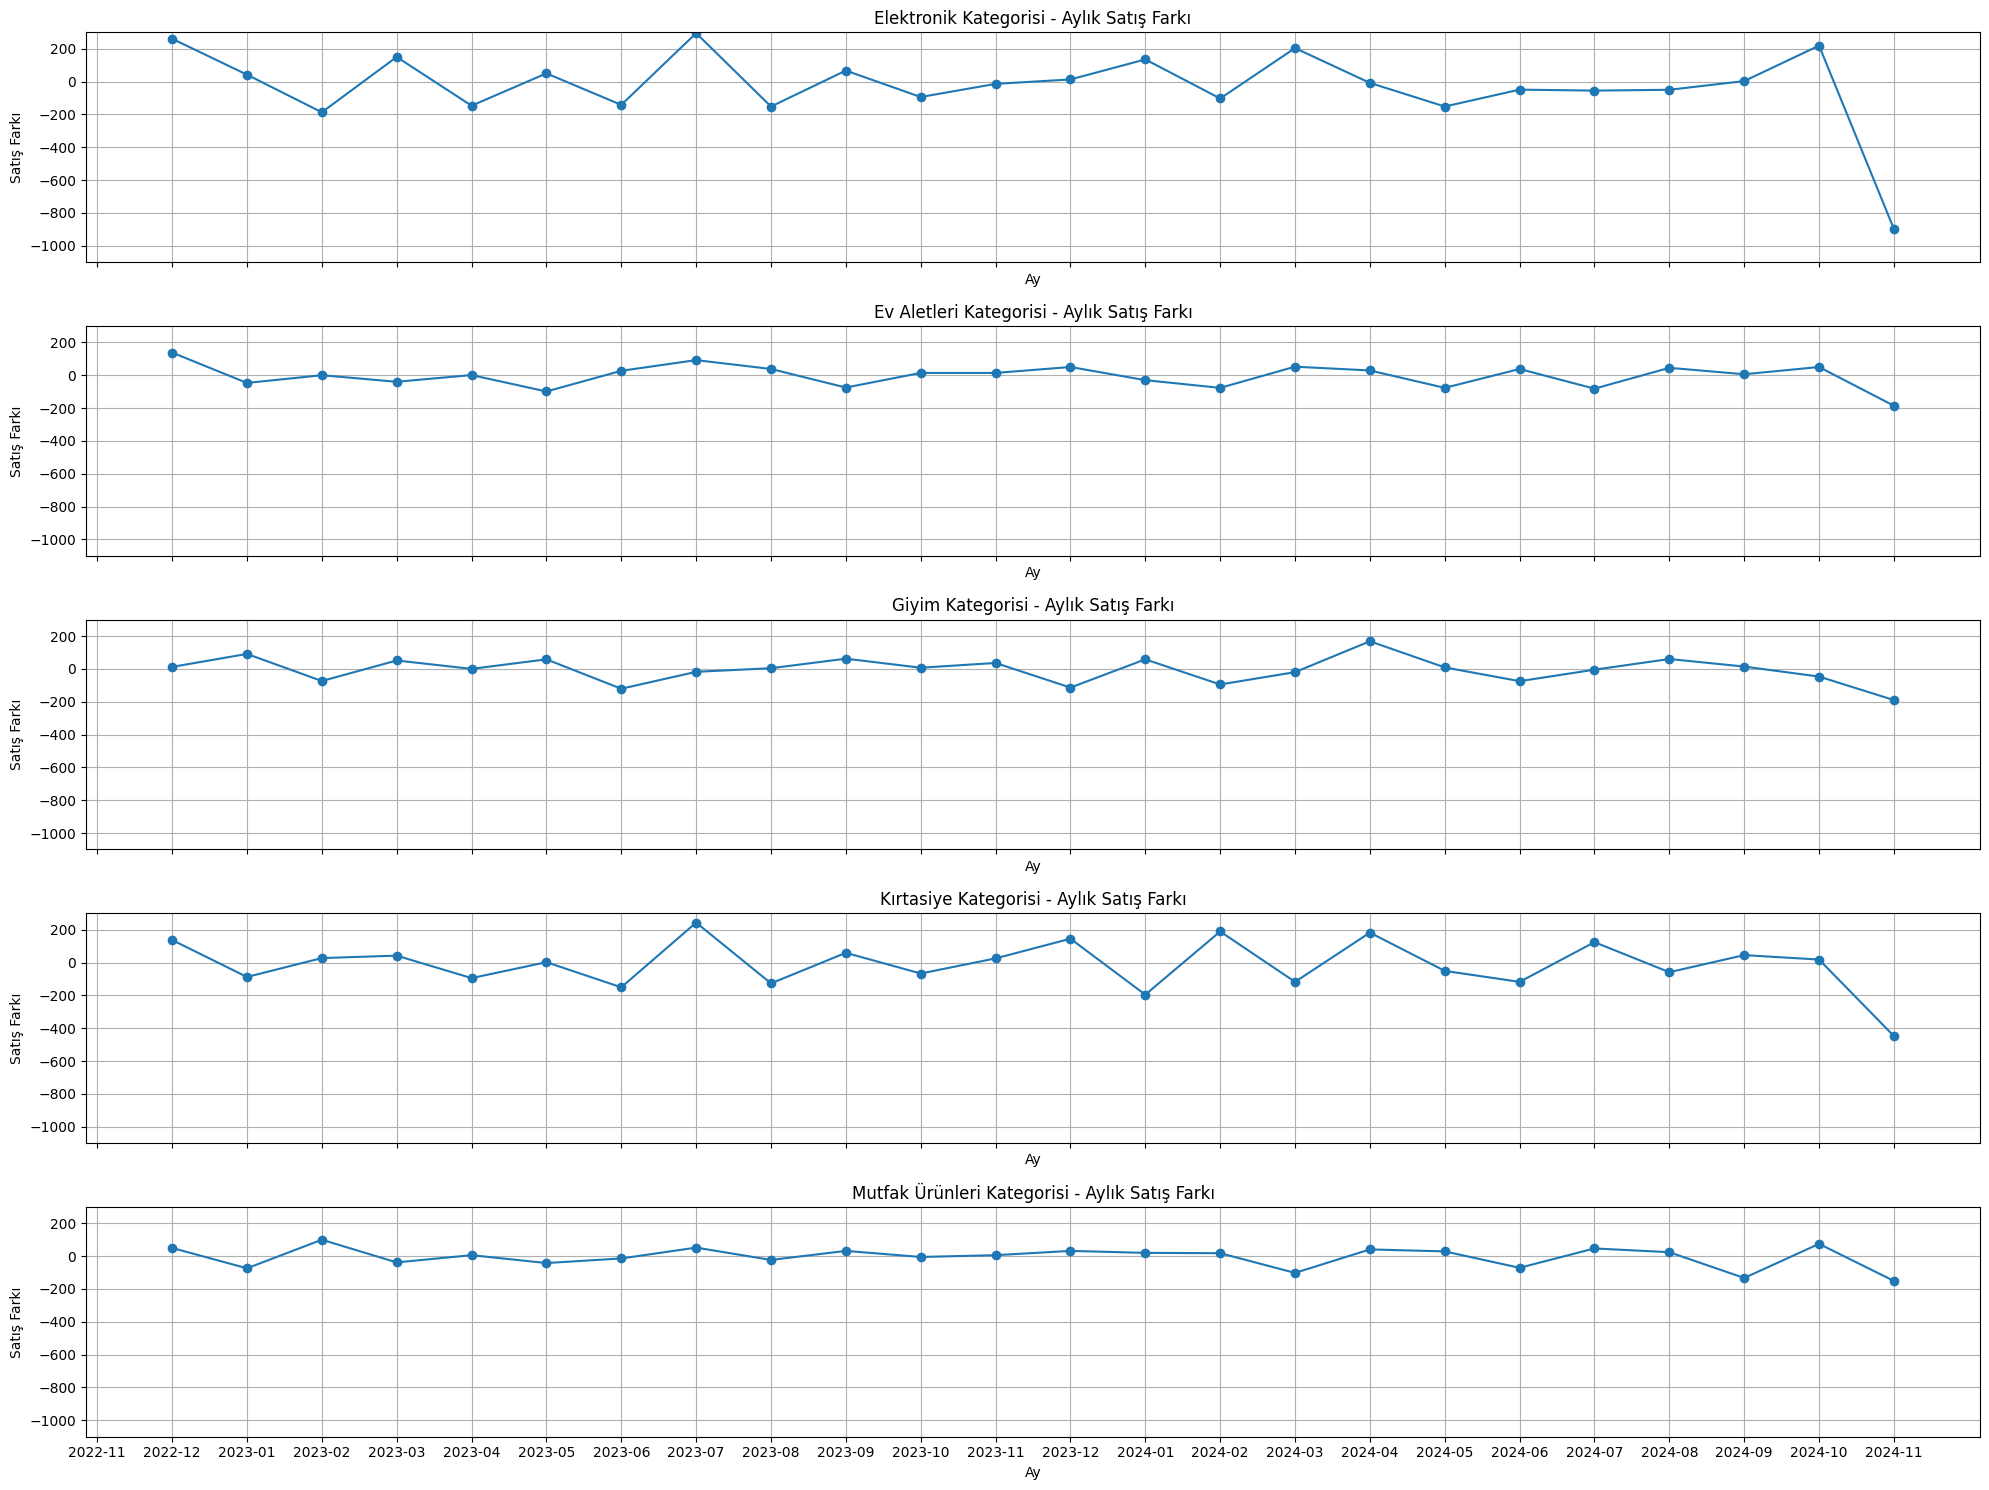

In [34]:
# Ay bazında 'kategori' ve 'tarih' sütunlarına göre satışları gruplama
kategoriSatisAylik = df.groupby(['kategori', 'ay'])['adet'].sum().reset_index()
kategoriSatisAylik = kategoriSatisAylik.sort_values(by=['kategori', 'ay'])

# Satış farklarını hesaplama (önceki ay ile fark)
kategoriSatisAylik['satis_farki'] = kategoriSatisAylik.groupby('kategori')['adet'].diff()

plt.figure(figsize=(12, 6))

kategoriler = kategoriSatisAylik['kategori'].unique()
nKategoriler = len(kategoriler)

fig, ax = plt.subplots(nKategoriler, 1, figsize=(20, 15), sharex=True)

for i, kategori in enumerate(kategoriler):
    kategoriData = kategoriSatisAylik[kategoriSatisAylik['kategori'] == kategori]
    
    ax[i].plot(kategoriData['ay'].astype(str), kategoriData['satis_farki'], marker='o', color='tab:blue')
    ax[i].set_title(f'{kategori} Kategorisi - Aylık Satış Farkı')
    ax[i].set_xlabel('Ay')
    ax[i].set_ylabel('Satış Farkı')
    ax[i].set_ylim([-1100,300])
    ax[i].grid(True)

plt.xlabel('Ay')

plt.tight_layout()
plt.show()

### Görev 5: Ekstra (BONUS)

### 1.Pareto Analizi: Satışların %80’ini oluşturan ürünleri belirleyin (80/20 kuralını uygulayın). Bu ürünleri grafikte gösterin.

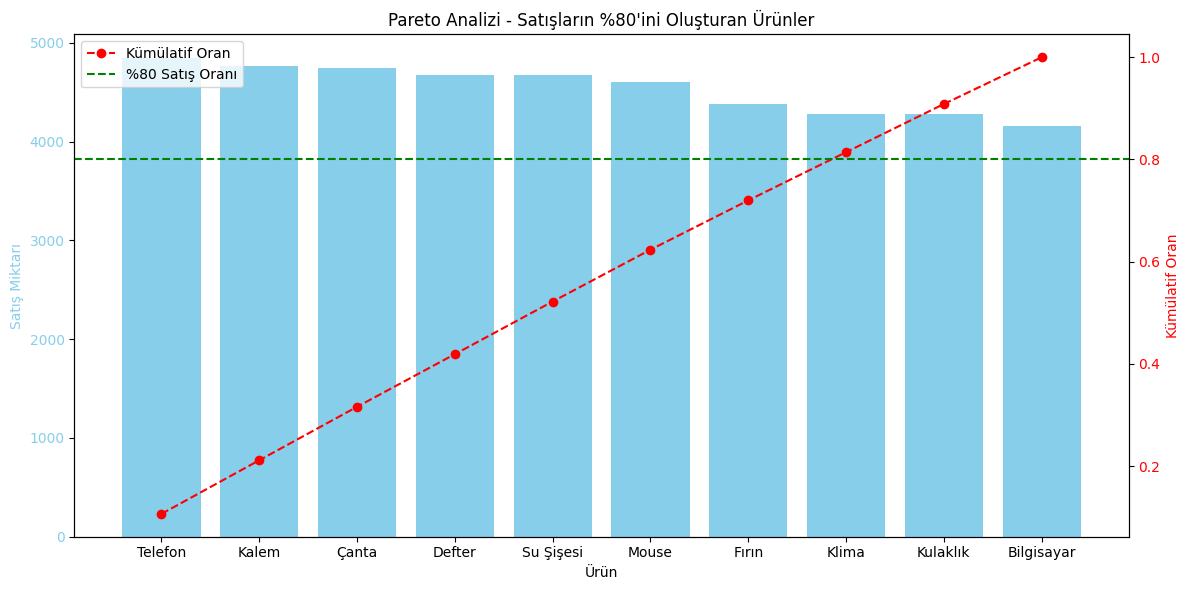

In [35]:
# Ürün satışlarının toplamını hesapla
urunSatis = df.groupby('ürün_adi')['adet'].sum().reset_index()
urunSatis = urunSatis.sort_values(by='adet', ascending=False)

# Kümülatif satış miktarlarını ve kümülatif oranı hesapla
urunSatis['kümülatif_satis'] = urunSatis['adet'].cumsum()
toplamSatis = urunSatis['adet'].sum()
urunSatis['kümülatif_oran'] = urunSatis['kümülatif_satis'] / toplamSatis

# %80'lik kısmı belirleyelim
paretoUrunler = urunSatis[urunSatis['kümülatif_oran'] <= 0.80]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(urunSatis['ürün_adi'], urunSatis['adet'], color='skyblue', label='Satış Miktarı')
ax1.set_xlabel('Ürün')
ax1.set_ylabel('Satış Miktarı', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(urunSatis['ürün_adi'], urunSatis['kümülatif_oran'], color='red', marker='o', label='Kümülatif Oran', linestyle='--')
ax2.set_ylabel('Kümülatif Oran', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Pareto Analizi - Satışların %80\'ini Oluşturan Ürünler')
plt.axhline(0.8, color='green', linestyle='--', label='%80 Satış Oranı')

plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


### 2. Cohort Analizi: Müşterilerin satın alım alışkanlıklarını analiz etmek için Pandas ile cohort analizi yapın. Örneğin, ilk kez satın alan müşterilerin tekrar alım oranlarını inceleyin.

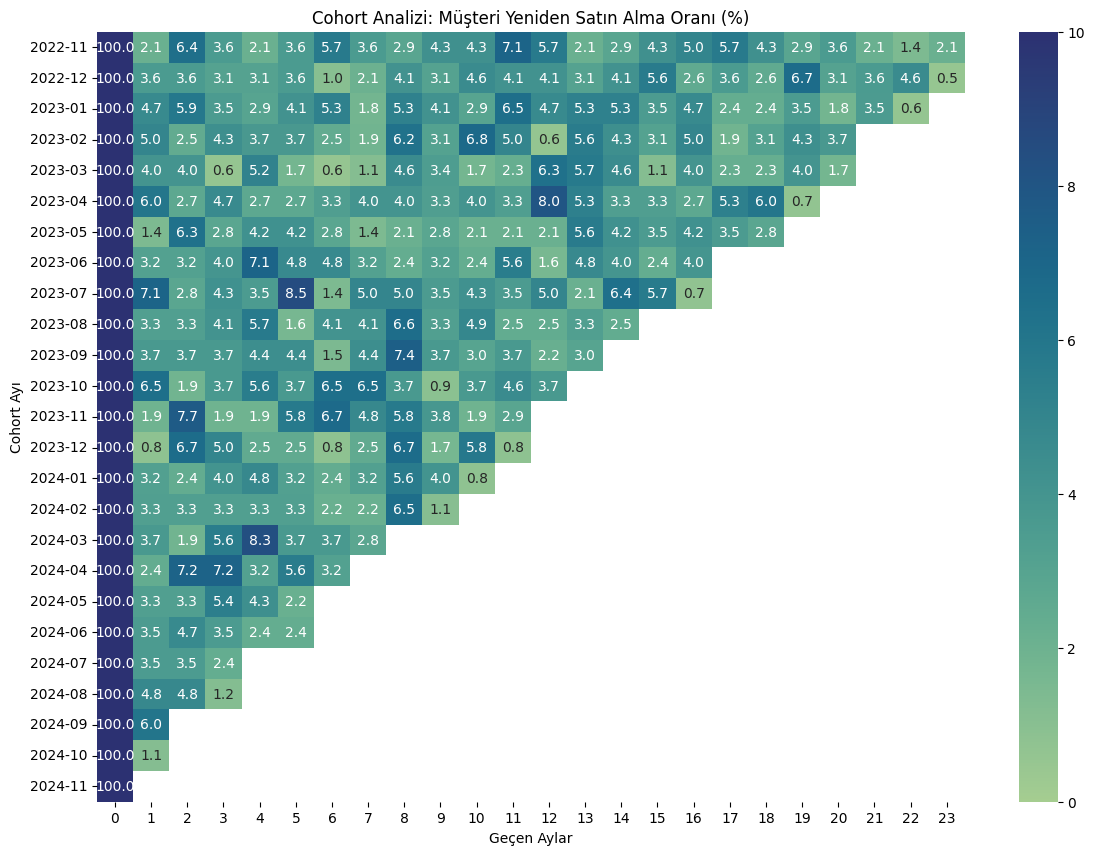

In [ ]:
musteriIlkSatis = df.groupby("musteri_id")["tarih"].min().reset_index()
musteriIlkSatis.columns = ["musteri_id", "ilk_satis_tarihi"]

birlesikData = pd.merge(df, musteriIlkSatis, on="musteri_id", how="inner")

birlesikData["cohort_ayi"] = birlesikData["ilk_satis_tarihi"].dt.to_period("M")
birlesikData["satis_ayi"] = birlesikData["tarih"].dt.to_period("M")

cohortData = (
    birlesikData
    .groupby(["cohort_ayi", "satis_ayi"])
    .agg({"musteri_id": pd.Series.nunique})
    .reset_index()
)
cohortData.columns = ["cohort_ayi", "satis_ayi", "aktif_musteri_sayisi"]

cohortData["gecen_aylar"] = (
    (cohortData["satis_ayi"] - cohortData["cohort_ayi"]).apply(lambda x: x.n)
)

cohortTablo = cohortData.pivot_table(
    index="cohort_ayi",
    columns="gecen_aylar",
    values="aktif_musteri_sayisi",
)

cohort_yuzde_tablosu = cohortTablo.divide(cohortTablo.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(14, 10))
sns.heatmap(cohort_yuzde_tablosu, annot=True, fmt=".1f", cmap="crest", vmax=10, vmin=0)
plt.title("Cohort Analizi: Müşteri Yeniden Satın Alma Oranı (%)")
plt.xlabel("Geçen Aylar")
plt.ylabel("Cohort Ayı")
plt.show()


### 3.Tahmin Modeli: Aylık veya haftalık satış miktarlarını tahmin etmek için basit bir regresyon modeli (örneğin Linear Regression) uygulayın. sklearn kullanarak train/test split işlemi ile modeli eğitin ve modelin doğruluğunu ölçün.

In [37]:
# Sadece bazı sütunları alma
df2 = copy.deepcopy(df[['tarih', 'toplam_satis']])
df2.head()

,tarih,toplam_satis
0,2024-01-10,16173.54
1,2024-06-06,3051.48
2,2023-03-24,7274.00
3,2023-12-07,1476.36
4,2023-03-22,2739.69


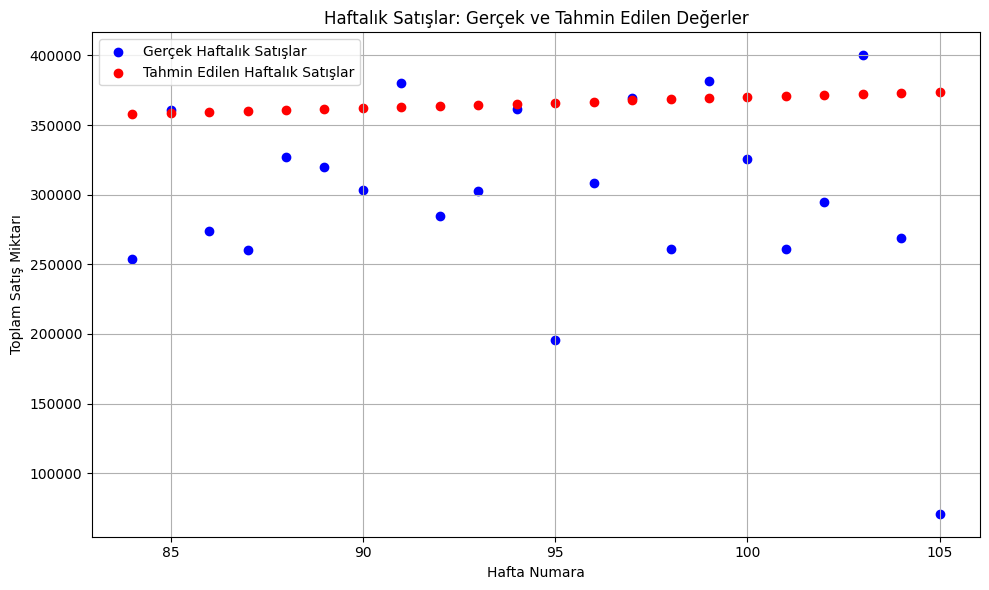

In [38]:
# Haftalık satışları hesapla: 'tarih' sütununu haftalara göre grupla
df2['hafta'] = df2['tarih'].dt.to_period('W')

# Haftalık toplam satışları hesapla
haftalıkDf = df2.groupby('hafta')['toplam_satis'].sum().reset_index()

# Haftaların sayısal temsilini almak için
haftalıkDf['hafta_num'] = np.arange(len(haftalıkDf))

# Özellik (X) ve hedef (y) değişkenlerini ayırma
X = haftalıkDf[['hafta_num']] 
y = haftalıkDf['toplam_satis']

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, shuffle=False)

# Regresyon modelini oluşturma ve eğitim
model = LinearRegression()
model.fit(xTrain, yTrain)
yPred = model.predict(xTest)

# MSE (Mean Squared Error) hesaplama
mse = mean_squared_error(yTest, yPred)

plt.figure(figsize=(10, 6))

plt.scatter(xTest, yTest, color='blue', label='Gerçek Haftalık Satışlar')
plt.scatter(xTest, yPred, color='red', label='Tahmin Edilen Haftalık Satışlar')
plt.title('Haftalık Satışlar: Gerçek ve Tahmin Edilen Değerler')
plt.xlabel('Hafta Numara')
plt.ylabel('Toplam Satış Miktarı')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()